# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>

### <div align="center"><font color='green'> Assignment 2  </font></div>
### <div align="center"><font color='green'> Reham AL-Talhi \ 3804757 </font></div>


## Introduction:  
Things in our world have become more connected and smart, and a massive amount of data has been generated automatically. The energy consumption of household appliances is the foundation of home energy management, and it is strongly dependent on weather and surroundings. Using weather as an example, it is hypothesised that on chilly days, household energy demand will be higher. In a home appliances network, time series and contextual data received from sensors can be monitored and controlled. The goal of this project is to anticipate energy consumption using a variety of algorithms and then Select the most ideal model as a final solution.

## Load packages 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import timedelta
import plotly.graph_objects as go
from lightgbm import LGBMRegressor
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

## Load dataset:
To assist us in training and testing the models, the datasets are divided into training and testing datasets.

In [3]:
# Loading dataset
UCI_data= pd.read_csv('UCI_data.csv')



## Data exploration
Using the head() function to check if everything will appear in the correct format as we expected. Also, to get a raw image of the dataset

In [4]:
UCI_data.head(3)

date         T1       RH_1         T2       RH_2     T3  \
0  2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.23   
1  2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.89   
2  2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.60   

        RH_3         T4       RH_4         T5  ...   RH_9  T_out  Press_mm_hg  \
0  37.030000  22.318571  36.610000  20.633333  ...  33.90    9.7   766.100000   
1  37.663333  18.700000  36.260000  18.463333  ...  41.09    0.3   740.333333   
2  36.290000  21.000000  34.826667  18.100000  ...  38.76    4.4   768.466667   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0    65.5        3.5   40.000000   3.350000  24.061869  24.061869   
1    99.0        1.0   41.333333   0.100000   4.622052   4.622052   
2    72.0        6.0   22.666667  -0.266667   5.635898   5.635898   

   TARGET_energy  
0             60  
1             50  
2             80  

[3 rows x 28 columns]

## A deeper look at the dataset:

- Date, date time year-month-day hour:minute:second
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in percent
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in percent
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in percent
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in percent
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in percent
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in percent
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in percent
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in percent
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in percent
- T_out, Temperature outside (from Chievres weather station), in Celsius
- Press_mm_hg or Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in percent
- Windspeed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, non dimensional
- rv2, Random variable 2, non dimensional

- Target column, Energy use in WH



#### Everything seems right till this step. Lets move on 

## Exploratory Data Analysis (EDA):

This stage is critical in the development of a machine learning model. EDA refers to a critical process of performing internal investigations on data in order to gain insights:

Checking the shape of the dataset 

In [5]:
print("UCI dataset has", UCI_data.shape, '(rows, columns)') 

UCI dataset has (19735, 28) (rows, columns)


## Some informations about the dataset: 

In [6]:
UCI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19735 non-null  object 
 1   T1             19735 non-null  float64
 2   RH_1           19735 non-null  float64
 3   T2             19735 non-null  float64
 4   RH_2           19735 non-null  float64
 5   T3             19735 non-null  float64
 6   RH_3           19735 non-null  float64
 7   T4             19735 non-null  float64
 8   RH_4           19735 non-null  float64
 9   T5             19735 non-null  float64
 10  RH_5           19735 non-null  float64
 11  T6             19735 non-null  float64
 12  RH_6           19735 non-null  float64
 13  T7             19735 non-null  float64
 14  RH_7           19735 non-null  float64
 15  T8             19735 non-null  float64
 16  RH_8           19735 non-null  float64
 17  T9             19735 non-null  float64
 18  RH_9  

> From the previous code, we can see the data type of each columns and null values as well. For example, T1 is a float type and contains no nulls and so on.

## Missing data 

In [7]:
# Missing Valuse 
UCI_data.isnull().sum()

date             0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64

> There is no missing data in the dataset 

## Duplication:

In [8]:
# Duplicated value 
data_dup = UCI_data.duplicated().any()
data_dup

False

> There is no duplicat data in the dataset,  otherwise the results will be presented as True

#### Extracting some new features (time features like month, weeks, days, etc.) These features may help boost the performance of our models




In [9]:
UCI_data['date'] = pd.to_datetime(UCI_data['date'])
UCI_data['month'] = UCI_data.date.dt.month
UCI_data['weekday'] = UCI_data.date.dt.day 
UCI_data['hour'] = UCI_data.date.dt.hour
UCI_data['week'] = UCI_data.date.dt.week
#UCI_data['Date'] = pd.to_datetime(UCI_data['date']).dt.date
#UCI_data['Time'] = pd.to_datetime(UCI_data['date']).dt.time

UCI_data_copy = UCI_data
UCI_data_copy = UCI_data_copy.set_index("date") # this copy will be used later on (time series modeling)
UCI_data_copy.index = pd.to_datetime(UCI_data_copy.index)

UCI_data.drop(columns=['date'], inplace=True)

In [10]:
UCI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T1             19735 non-null  float64
 1   RH_1           19735 non-null  float64
 2   T2             19735 non-null  float64
 3   RH_2           19735 non-null  float64
 4   T3             19735 non-null  float64
 5   RH_3           19735 non-null  float64
 6   T4             19735 non-null  float64
 7   RH_4           19735 non-null  float64
 8   T5             19735 non-null  float64
 9   RH_5           19735 non-null  float64
 10  T6             19735 non-null  float64
 11  RH_6           19735 non-null  float64
 12  T7             19735 non-null  float64
 13  RH_7           19735 non-null  float64
 14  T8             19735 non-null  float64
 15  RH_8           19735 non-null  float64
 16  T9             19735 non-null  float64
 17  RH_9           19735 non-null  float64
 18  T_out 

Checking the datatype again befor moving forward (object datatype is no longer exist), all the data are int or float64, so far so good lets continue 




## Relationship between variable:
btween target column and other columns in the dataset 

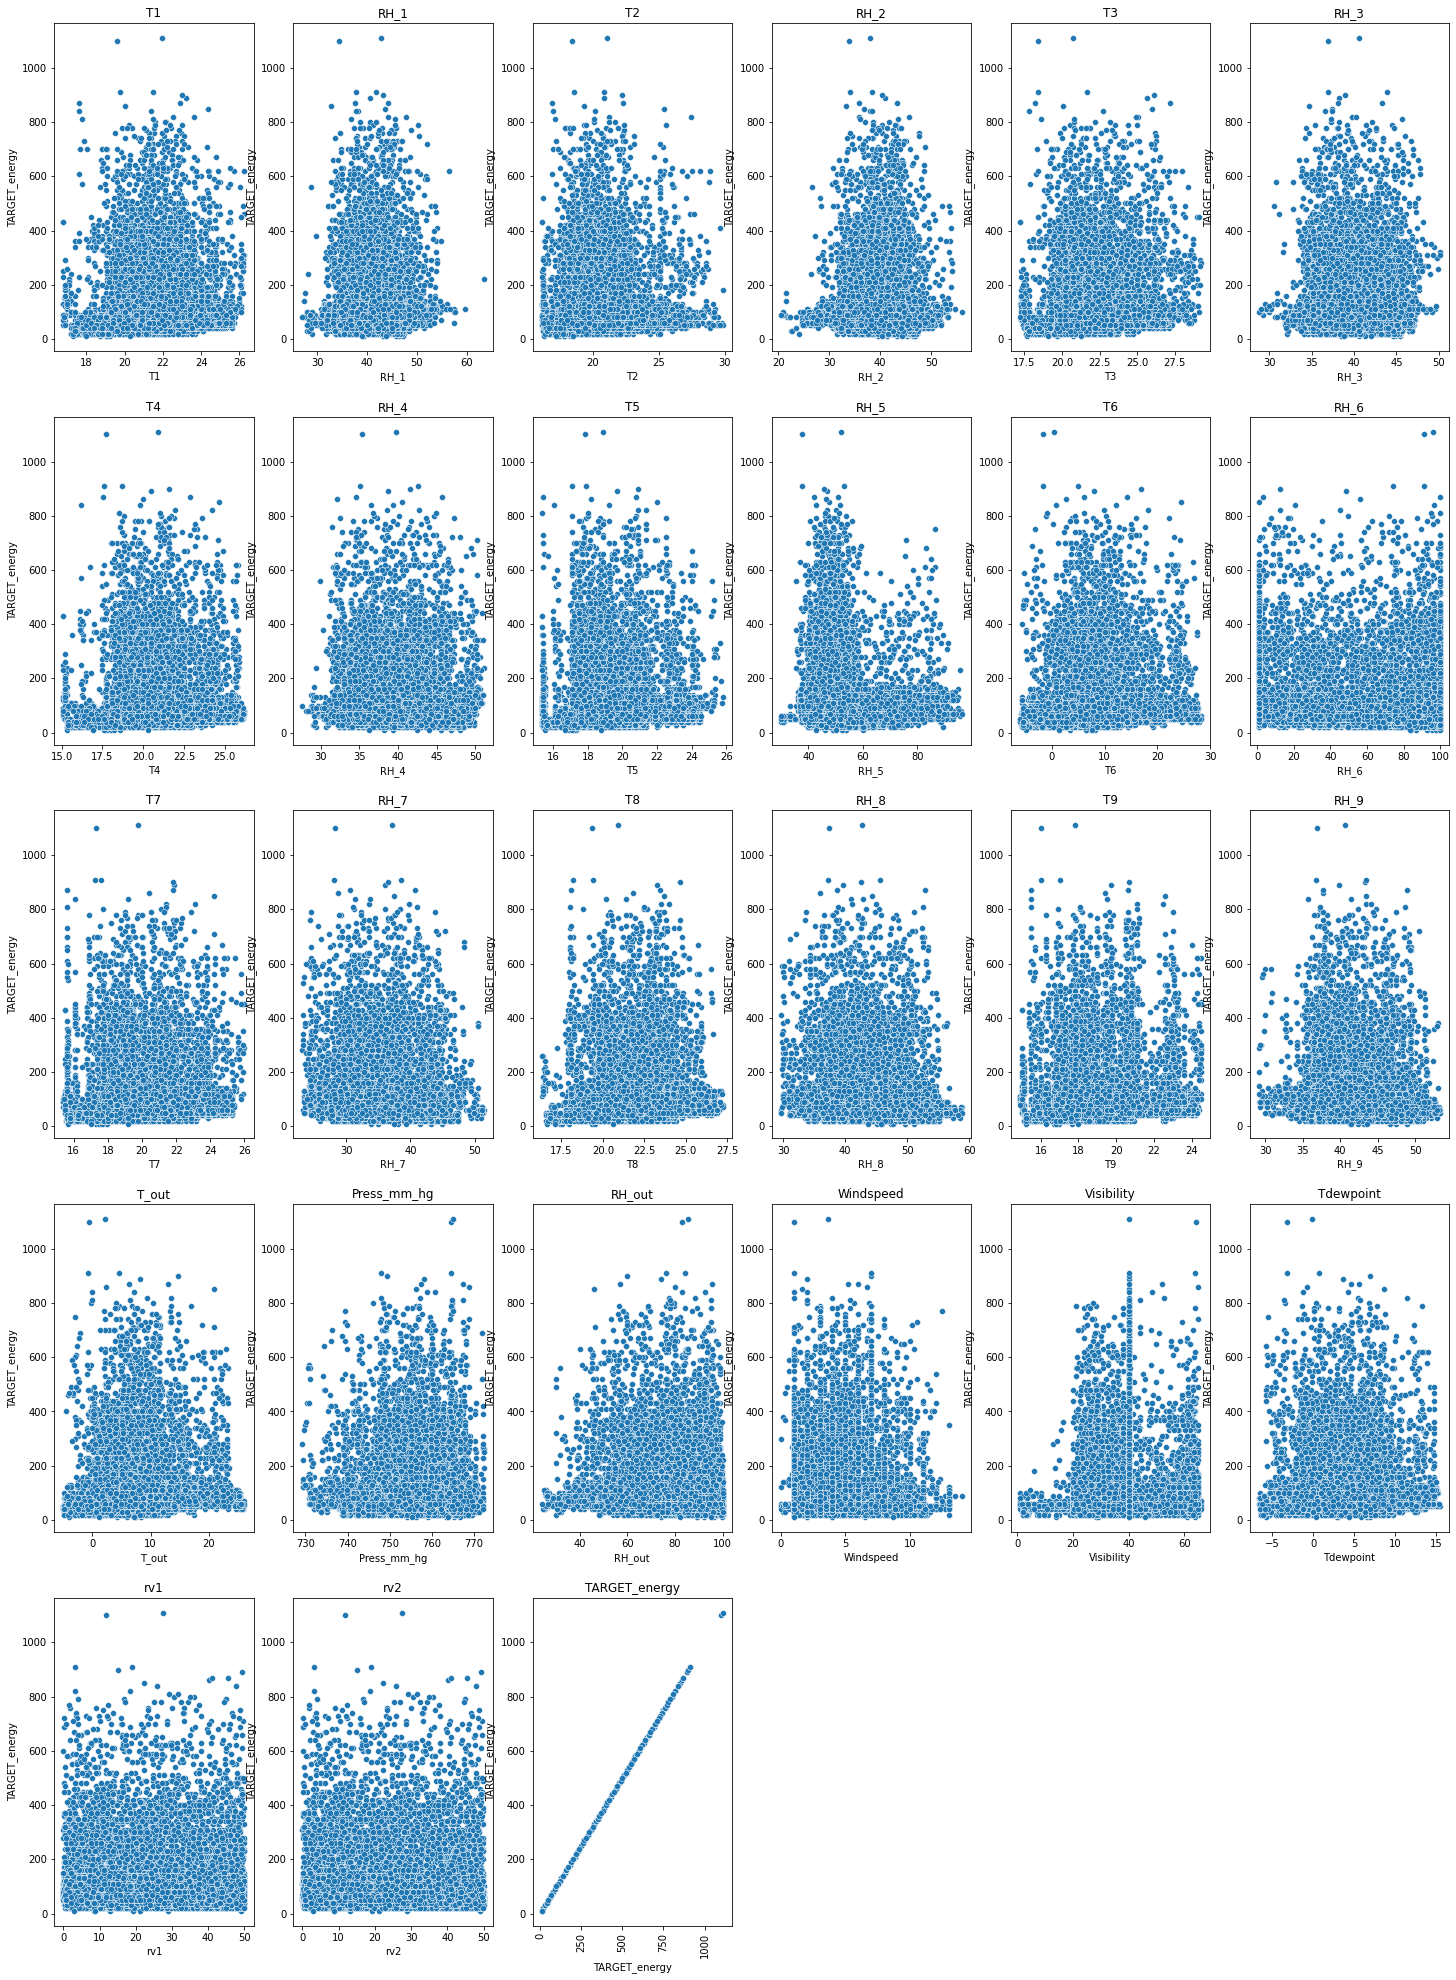

In [11]:
import seaborn as sns

plt.figure(figsize=(25,35))
New_UCI_data = UCI_data
New_UCI_data = New_UCI_data.drop(columns=['month', 'weekday', 'hour','week'])

for i, col in enumerate(New_UCI_data.columns):
    plt.subplot(5,6,i+1)
    sns.scatterplot(data=New_UCI_data, x=col, y='TARGET_energy')
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:** 
> <span style="font-size:1em;">   
No lineaer relation bttween the target and other columns, this is quite reasonable due to tha fact that enrgy data are non linear in real-world

In [182]:
#Sorting the columns into groups depending on their categories.

temp_cols = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
humidity_cols = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather_cols = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
random_cols = ["rv1", "rv2"]
date_time_cols = ['Date', 'Time', 'Hour', 'Month', 'Week', 'Day']
target = ["TARGET_energy"]



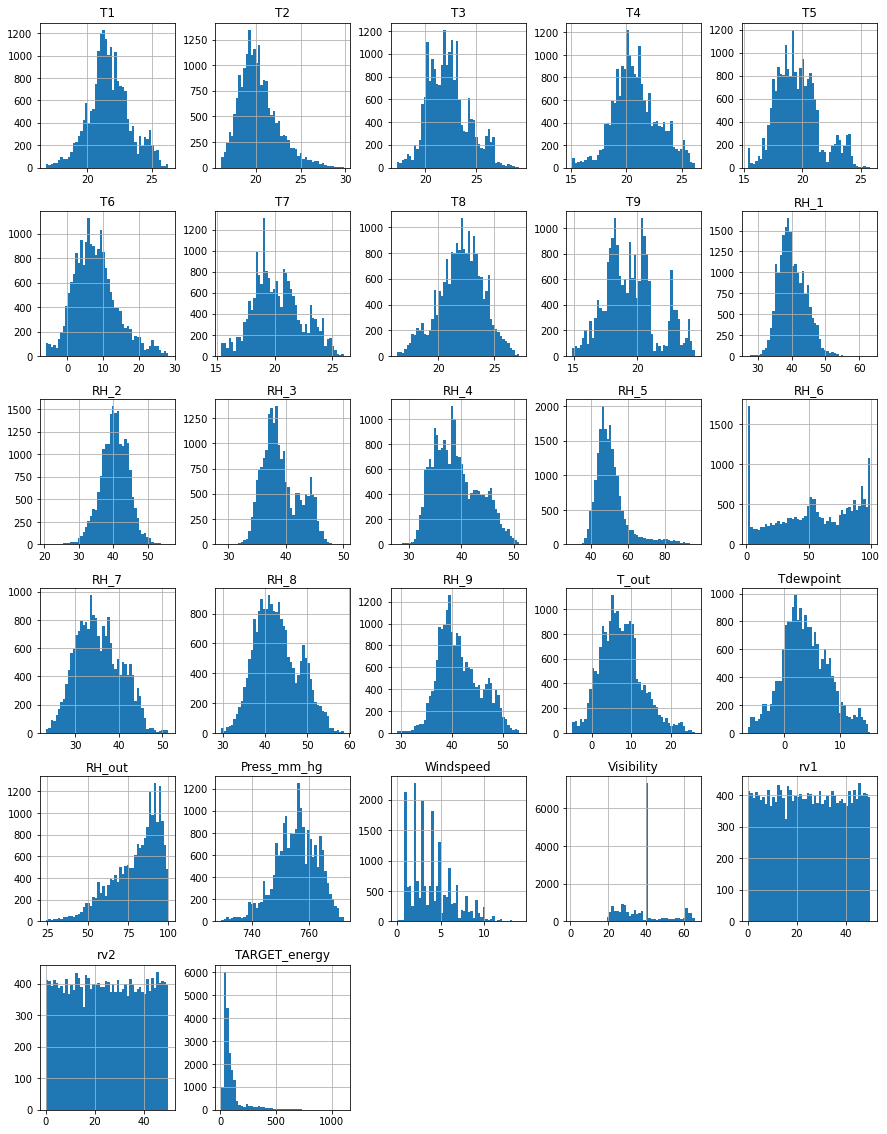

In [183]:
UCI_data[temp_cols+ humidity_cols+ weather_cols+ random_cols+ target].hist(bins=50, figsize=(15,20));

### Lets see the distrution with Q–Q plot


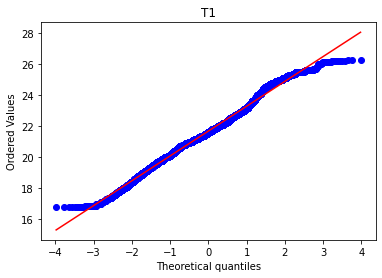

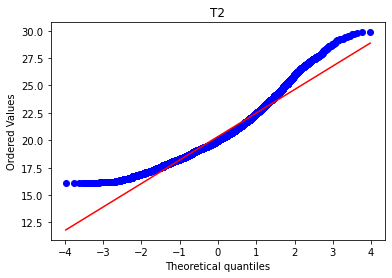

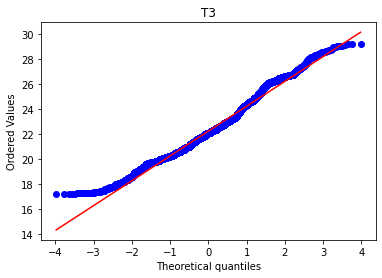

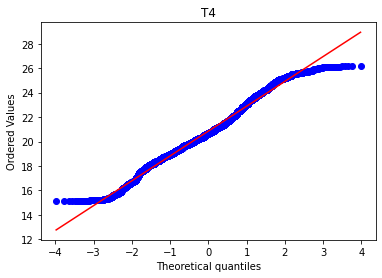

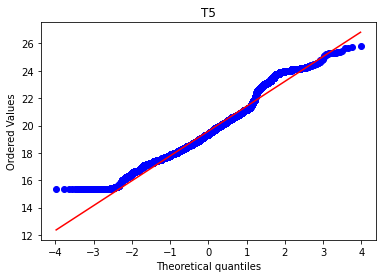

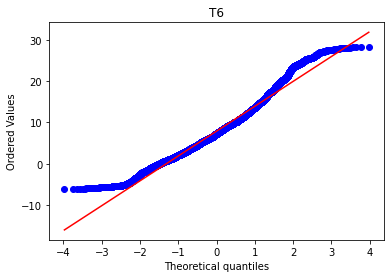

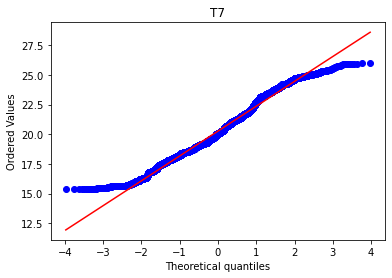

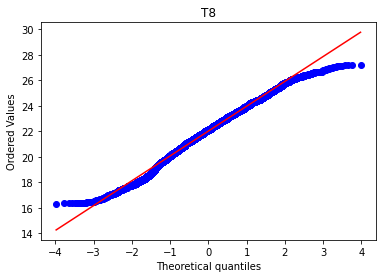

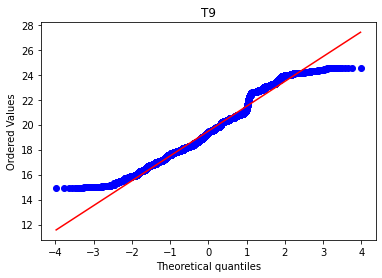

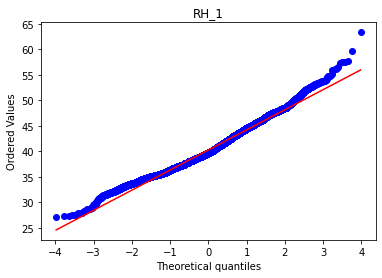

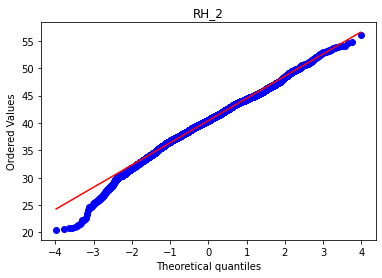

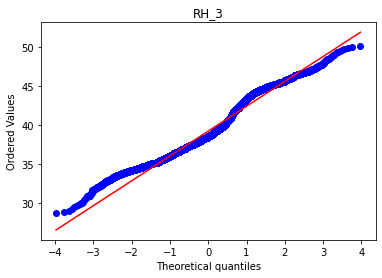

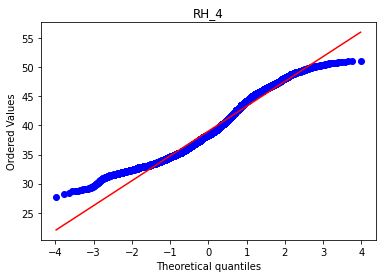

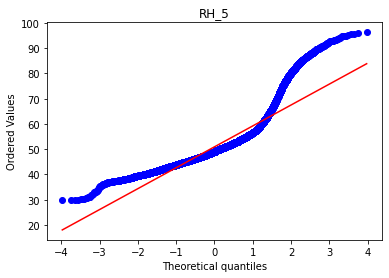

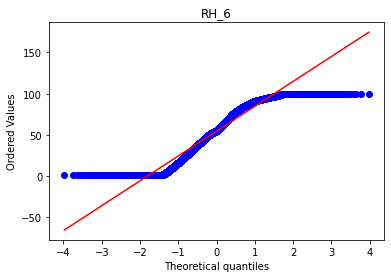

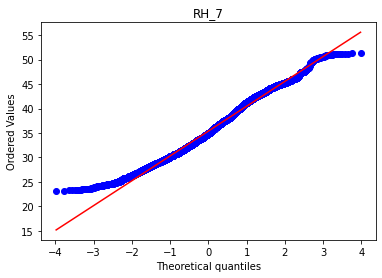

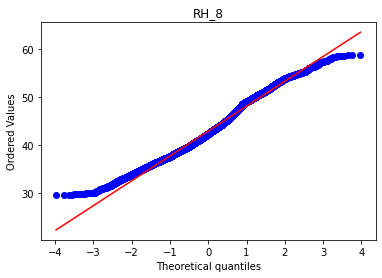

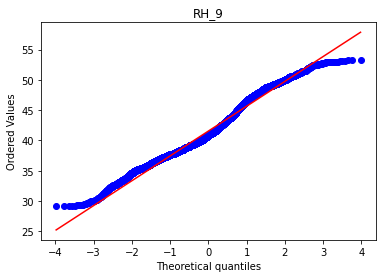

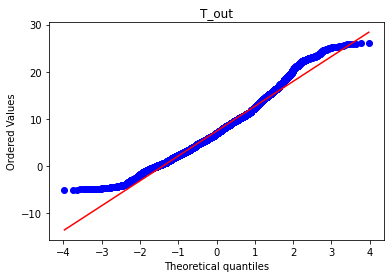

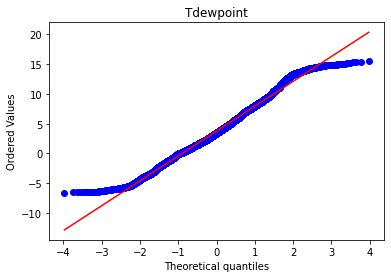

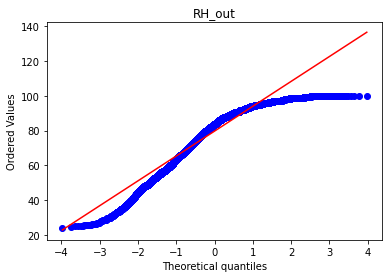

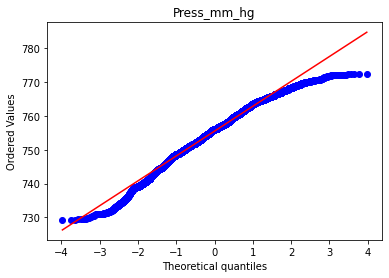

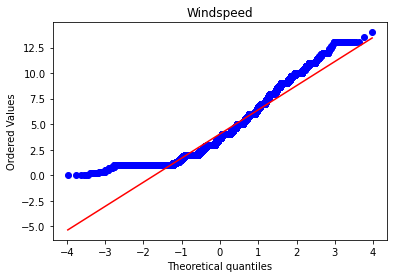

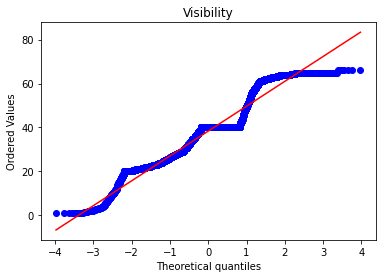

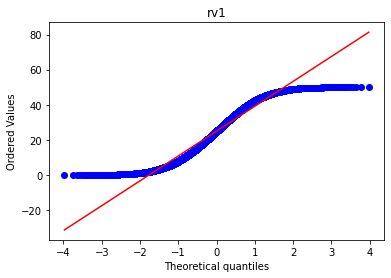

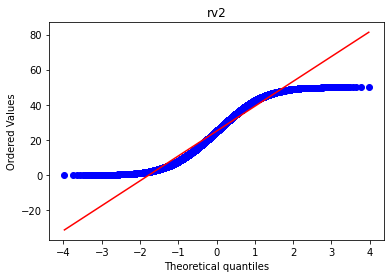

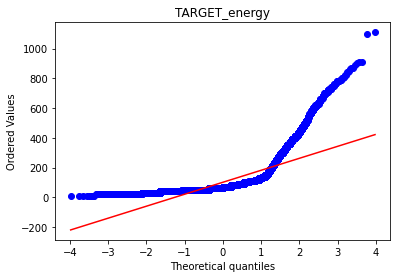

In [184]:
from scipy import stats

for col in UCI_data[temp_cols+ humidity_cols+ weather_cols+ random_cols+ target].columns:
    stats.probplot(UCI_data[col], dist='norm', plot=plt, fit=True)
    plt.title(col)
    plt.show()


Features have an almost normal distribution: T1, RH_7, RH_8, RH_9 , t_out, T6, T7, T8, RH_2,RH_3,RH_4, RH_1.          
Skewed features: T9, T3, T4, T5, RH_5, T2, Target_energy, visibility, windspeed, Rh_out, Press_mm_hg.         
Randomly distributed features : rv1, rv2, RH_6. 

## Target columns:
It needs to be fixed a bit to get a data distribution close to the normal distribution, we will try several methods and see which one fits the most

In [185]:
Target_vs_Original = UCI_data[['TARGET_energy']].copy()
def normal_distribution(data,feature):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=plt)
    plt.show()

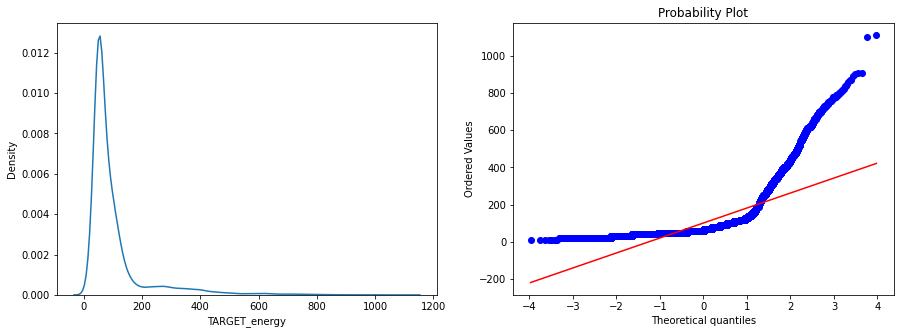

In [186]:
normal_distribution(Target_vs_Original,'TARGET_energy')

### Log transformation:

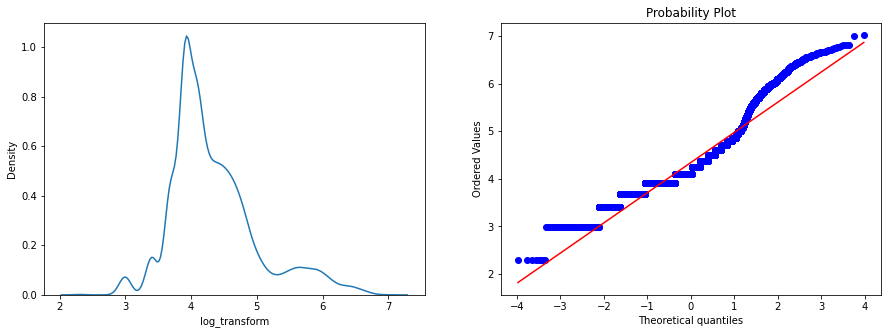

In [187]:
Target_vs_Original['log_transform']=np.log(Target_vs_Original['TARGET_energy'])
normal_distribution(Target_vs_Original,'log_transform')

### reciprocal transformation:

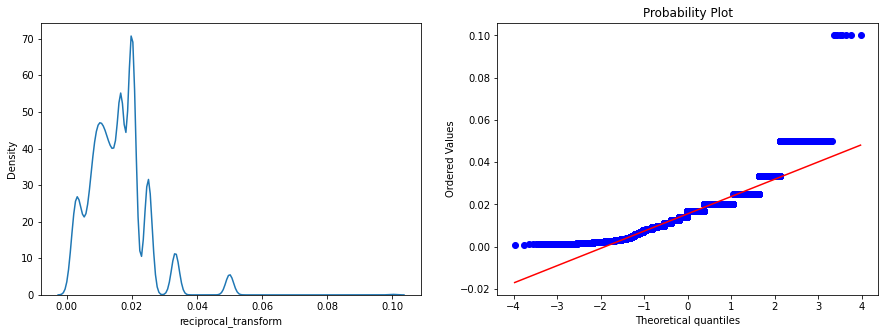

In [188]:
Target_vs_Original['reciprocal_transform']=1/Target_vs_Original.TARGET_energy
normal_distribution(Target_vs_Original,'reciprocal_transform')

### sqroot transformation:

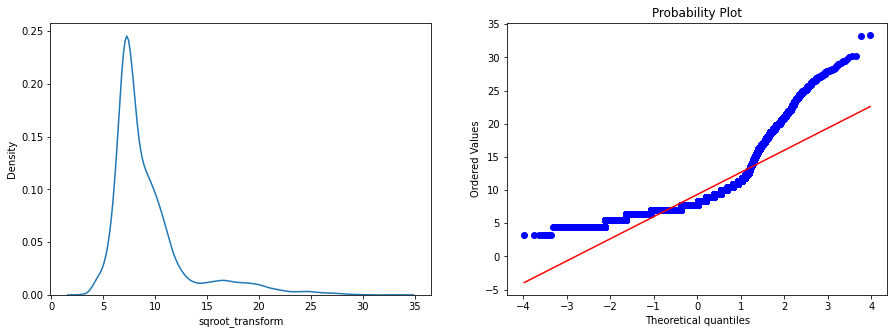

In [189]:
Target_vs_Original['sqroot_transform']= np.sqrt(Target_vs_Original.TARGET_energy)
normal_distribution(Target_vs_Original,'sqroot_transform')

### Boxcox transformation:

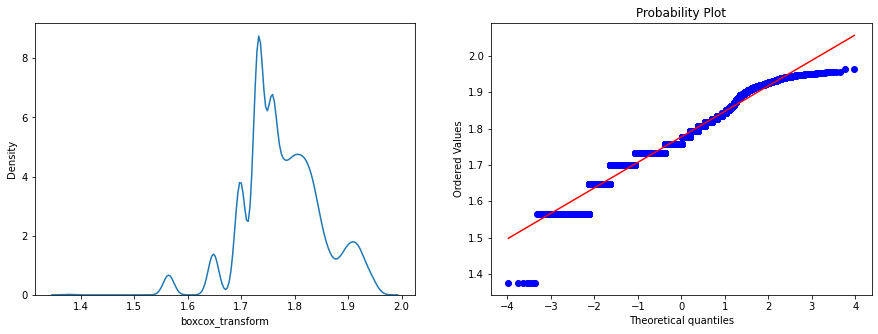

In [190]:
Target_vs_Original['boxcox_transform'], parameters= stats.boxcox(Target_vs_Original['TARGET_energy'])
normal_distribution(Target_vs_Original,'boxcox_transform')

>The best transformation is log so, we will add it to the dataset 

In [12]:
data_transformed = UCI_data.copy()
data_transformed['TARGET_energy'] = np.log(data_transformed['TARGET_energy'])

## Correlation
The corrlation between columns is important in devoleping ML model, to see which columsn are related to  

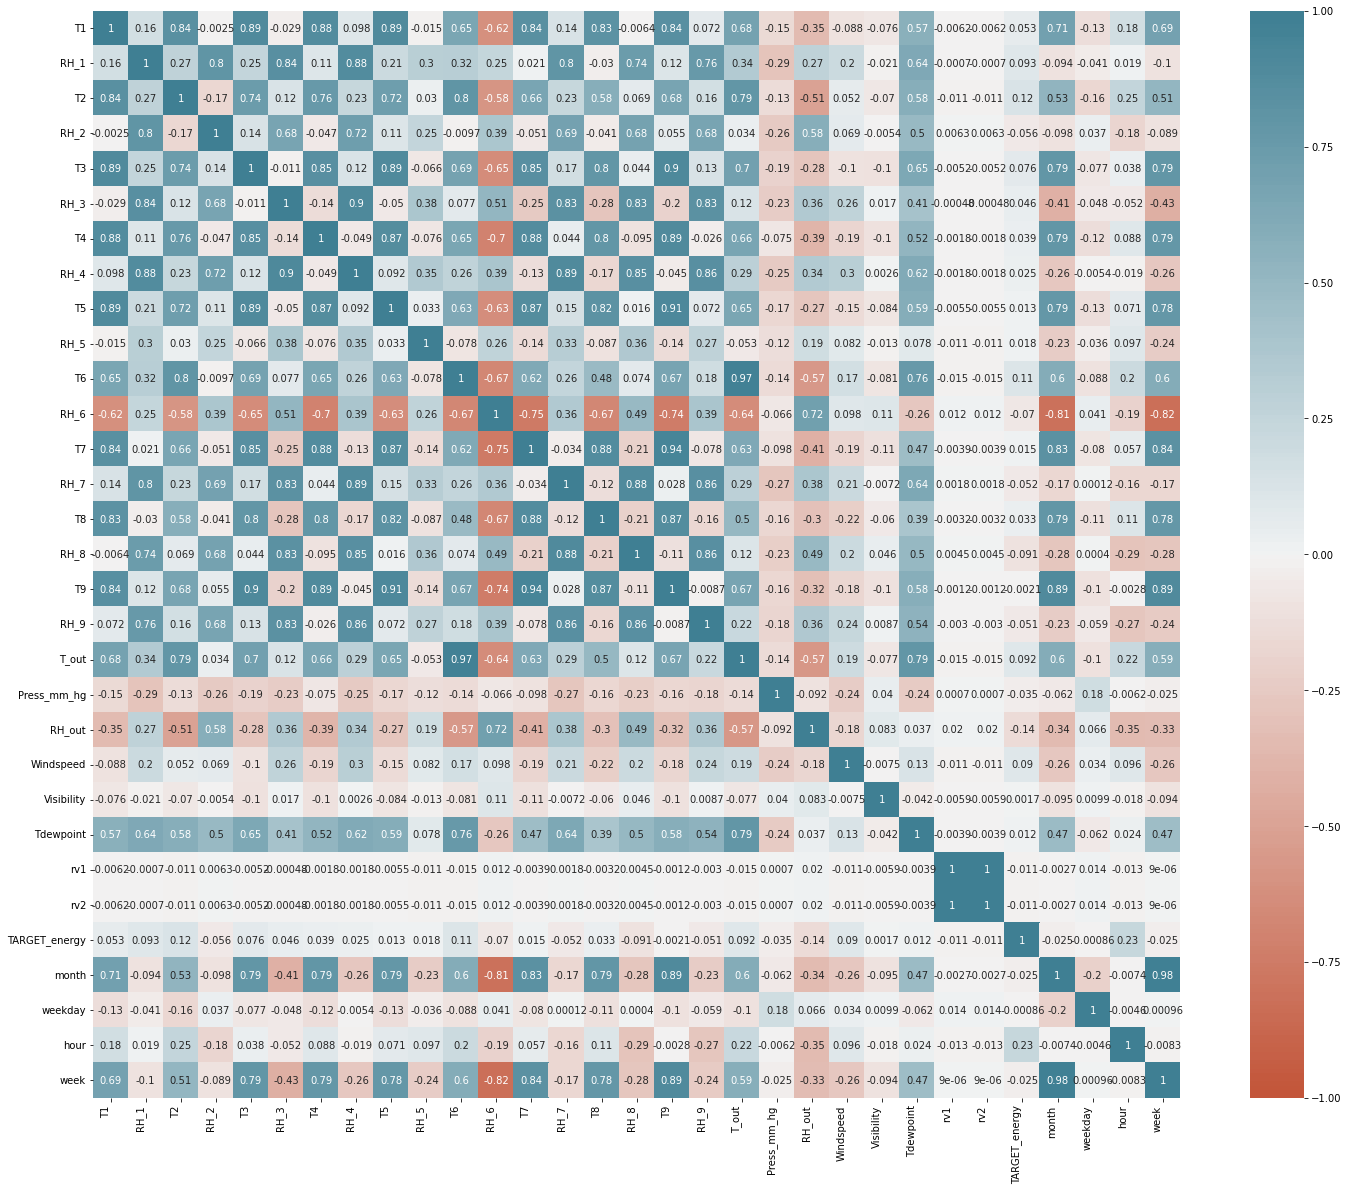

In [192]:
import seaborn as sns

f, ax = plt.subplots(figsize=(25, 20))
corr = UCI_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
  
);

> <span style="font-size:1em;">✔</span> **Observations:** 
>Overall, the correlation are good between all variables however some are week for example: 
> - rv1 and rv2 will be removed sicne they have the lest collaration with all other columns encluding target column 
> -  Temperature fetutrs have strong positive correlations with eachother like T3 has T7 and T1 and T3
>-  as well as humidity fetutrs such as RH_1 has RH_8
>-  Tdewpoint has many strong positive correlations with many other columns, such as temperature and humidity columns, but not tith the target column. 

These insights help us in choosing the feartures for the model but the rv1 and rv2 columns will not be selected as a feature for training the model scince it has low correlation with all other columns. 




### After log transformation: 

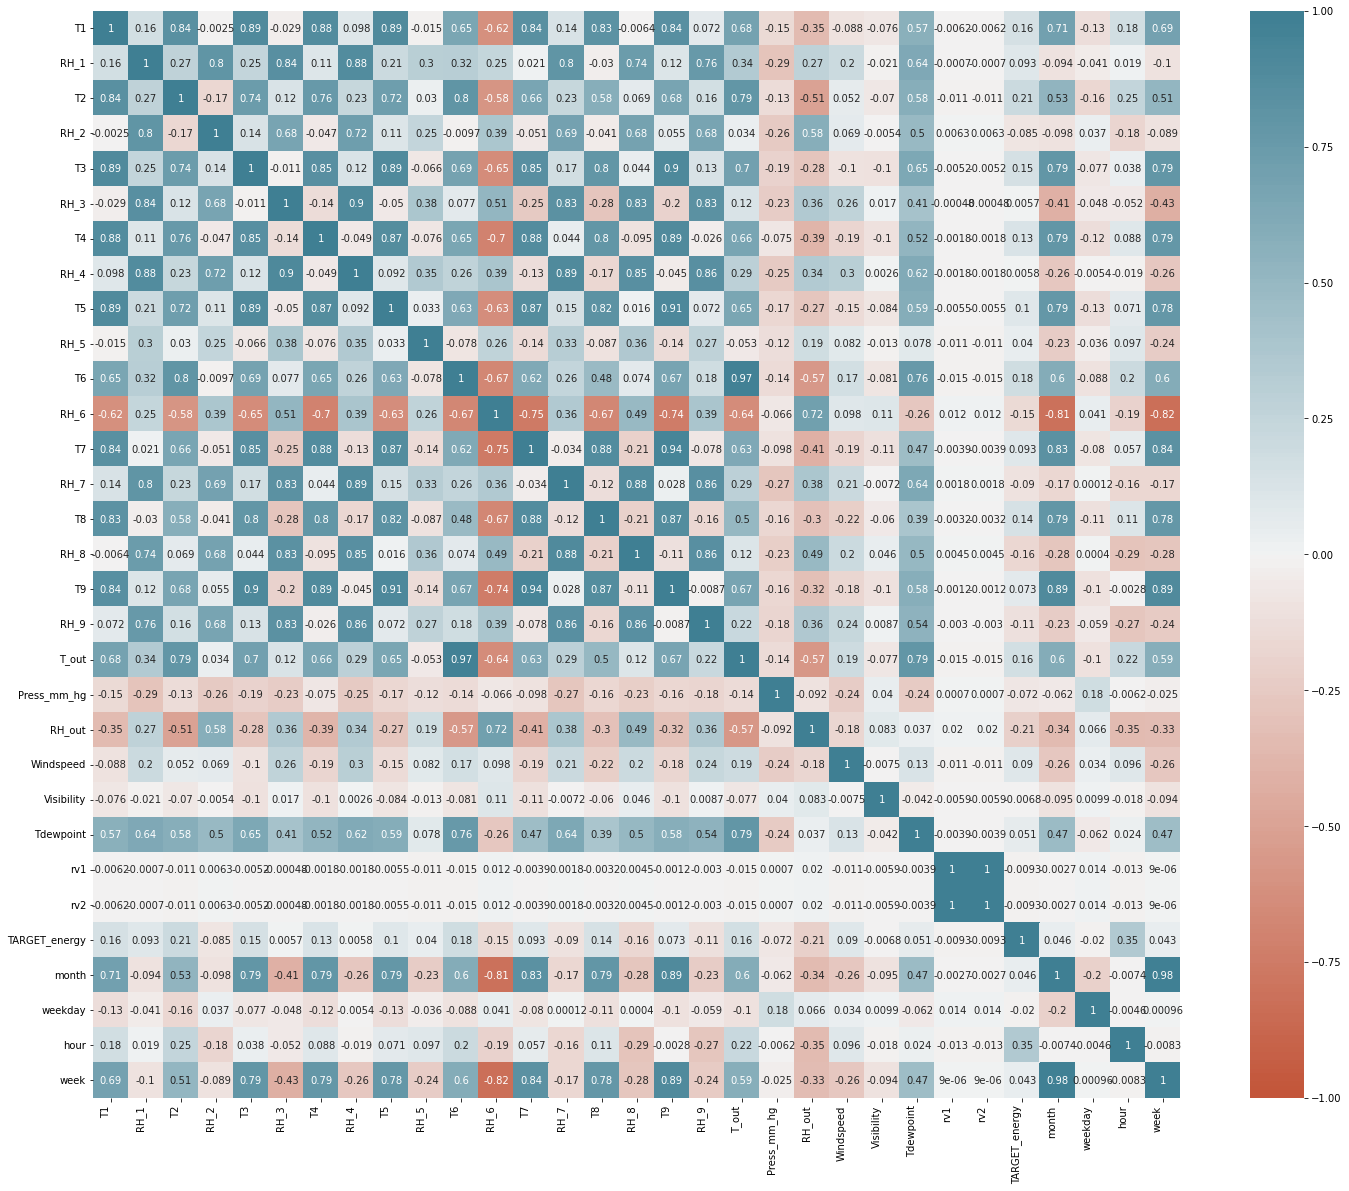

In [193]:
import seaborn as sns

f, ax = plt.subplots(figsize=(25, 20))
corr = data_transformed.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
  
);



> After transforming the target column data, we can see that the features have better cooperation with the target column, for example, T2 increased from 0.12 to 0.21, etc.

### Energy with Respect to Time date
This graph is an overview of energy consumption for 5 months in 2016

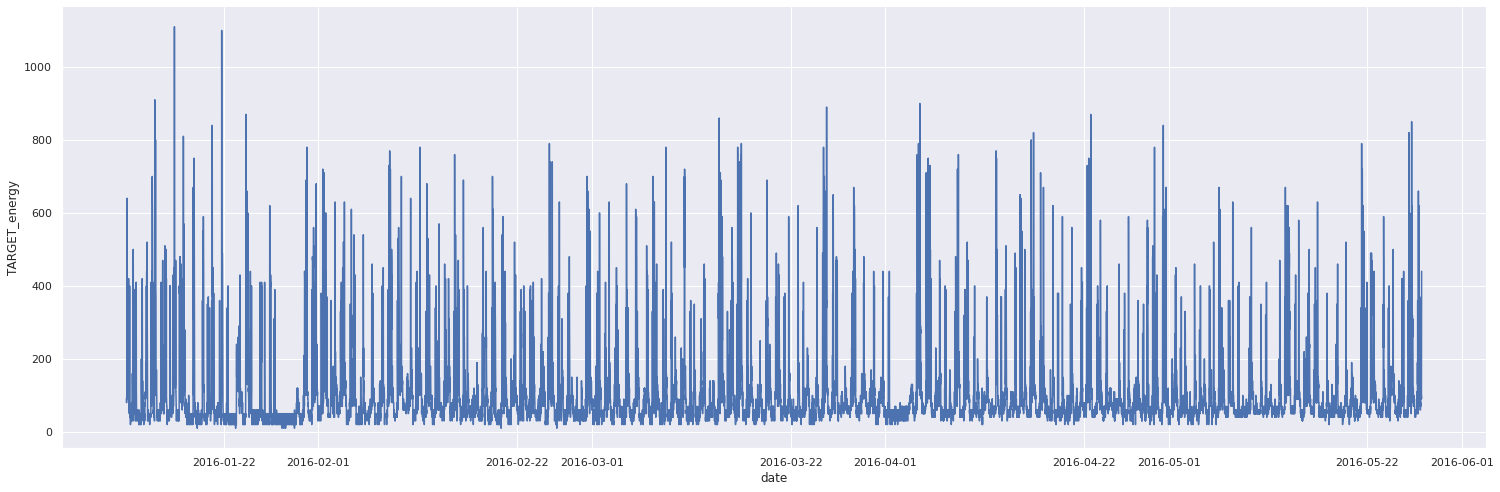

In [295]:
sns.relplot(data=UCI_data_copy, x='date', y='TARGET_energy', kind='line', height=7, aspect=3)
plt.show()

#### Lets break this down

In [198]:

print(data_transformed.month.unique(),"\n")
print("Total Number of Unique Month", data_transformed.month.nunique(), "\n")

print(70*"=")
print(data_transformed.week.unique(),"\n")
print("Total Number of Unique week", data_transformed.week.nunique(), "\n")

print(70*"=")
print(data_transformed.hour.unique(),"\n")
print("Total Number of Unique Hour", data_transformed.hour.nunique(), "\n")

print(70*"=")
print(data_transformed.weekday.unique(),"\n")
print("Total Number of Unique Day", data_transformed.weekday.nunique(), "\n")



[4 3 1 2 5] 

Total Number of Unique Month 5 

[16  9 11  3  6  7 12 17 14  8 21 19 20 15 10 13  4  5  2 18] 

Total Number of Unique week 20 

[20  4 12 15  0  1 22 10 19 18  6  5  2 13  8 16 11 14  9  3 21 17 23  7] 

Total Number of Unique Hour 24 

[19  5 14 22 10 16 13 24 23  3 25  6 20 21 27 26 11  8 18 28 30  2  1 15
 12  7 31 17 29  9  4] 

Total Number of Unique Day 31 



#### The relationship between energy use and hours of the day

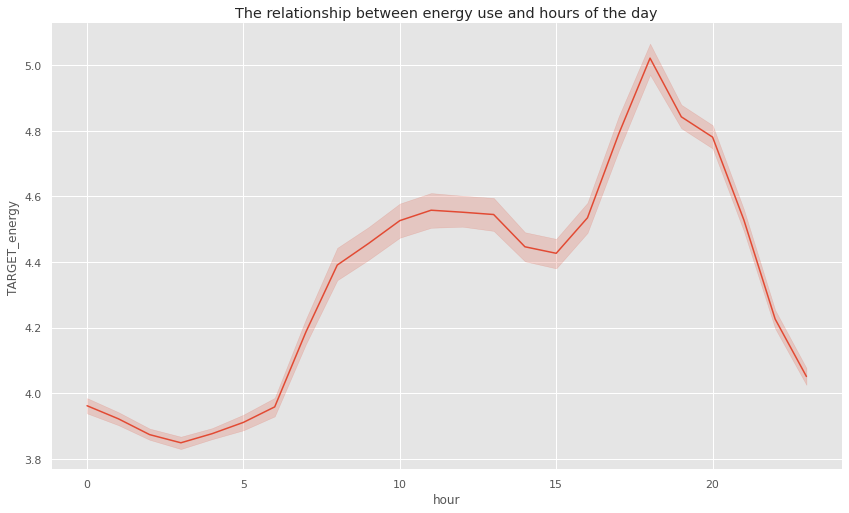

In [211]:
sns.relplot(y='TARGET_energy', x='hour', data=data_transformed, kind='line', height=7, aspect=1.7).set(title='The relationship between energy use and hours of the day')
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:** 
> <span style="font-size:1em;">   
form Previous graph, we notied that the using of electricity btween 12 am until 5 am is diceade compared to other hours and it raises form 6 to 10, this is  reasonable because people wake up in those hours and get prepared to work and so on. Form 10am to 15am is steady but after 15pm to 20pm (3pm to 8pm) there is a peak Because it is a an evening time people normally go back home cocing dinners, using heaters, ovens ans etc. and after 8pm to 11pm (20 pm to 23 pm) the usage dicreas people normally sleep at these hours. 

### Energy with Respect to Month:


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Month')

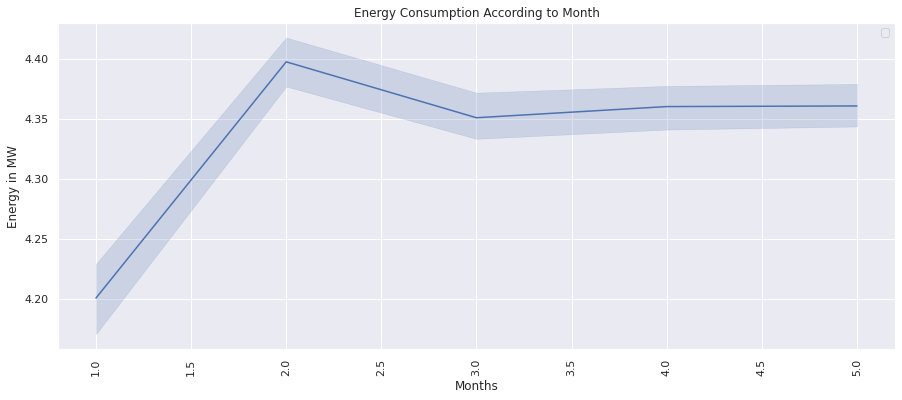

In [298]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
style.use('ggplot')



sns.lineplot(x=data_transformed["month"], y=data_transformed["TARGET_energy"], data=data_transformed)
sns.set(rc={'figure.figsize':(15,6)})

plt.xlabel("Months")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Month")

> <span style="font-size:1em;">✔</span> **Observations:** 
> <span style="font-size:1em;">   
Form the previous graph, we have 5 months from 1 to 5 (Jan to May), the usage of the eleceracty is going up and down due to many facts could be the weather, hours Works, sleeping hours, holidaies, and etc. Plus, there is a peak in the beginning of April. This graph is not that infomative just shows the discreution of data other 4 months. we will see the distruotion of data houraly to gain more insights   

### Energy with Respect to weekdays


No handles with labels found to put in legend.


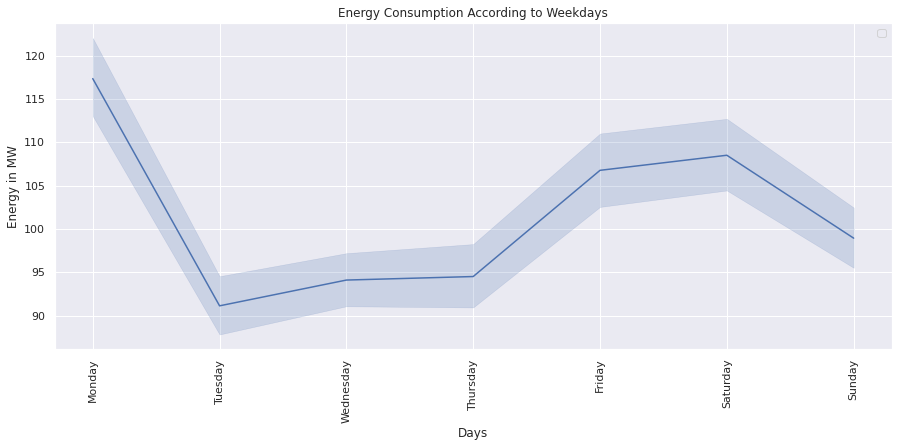

In [293]:
from matplotlib import style
from pandas.api.types import CategoricalDtype


UCI_data_days= pd.read_csv('UCI_data.csv')
UCI_data_days["Day"] = pd.to_datetime(UCI_data_days["date"]).dt.day_name()

cats= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
UCI_data_days["Day"] = UCI_data_days["Day"].astype(cat_type)
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
style.use('ggplot')
sns.lineplot(x=UCI_data_days["Day"], y=UCI_data_days["TARGET_energy"], data=UCI_data_days)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy Consumption According to Weekdays")
plt.xlabel("Days")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)



> <span style="font-size:1em;">✔</span> **Observations:** 
> <span style="font-size:1em;">   
Mondays are the days when people use the most electricity; however, Tuesdays, Wednesdays, and Thursdays see a decline in energy use, which then rises again from Friday to Sunday (weekends)

#### Temperature columns frequency

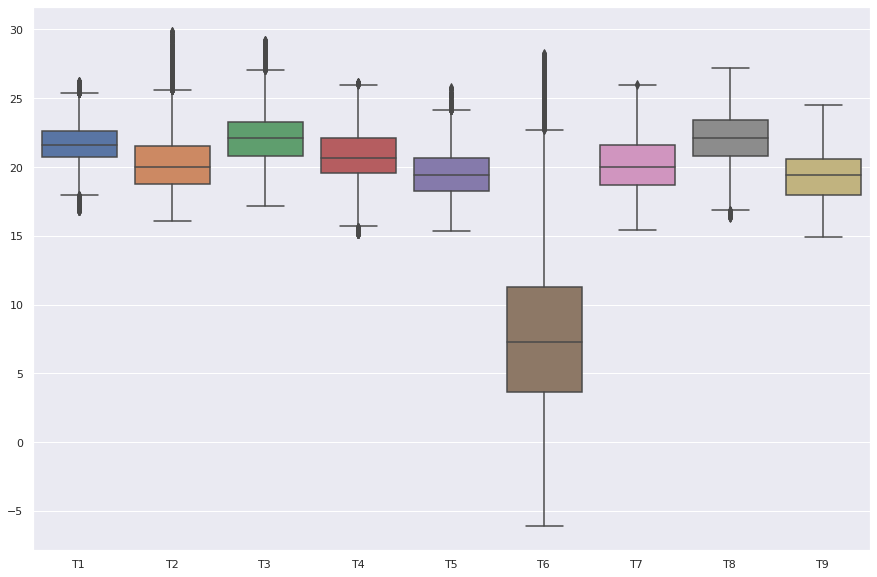

In [320]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
ax = sns.boxplot(data=UCI_data[["T1","T2","T3","T4","T5","T6","T7","T8","T9"]] )

Temperature in laundry room (T3) and Temperature in teenager room (T8) have the highest frequency

#### Humidity  columns frequency:

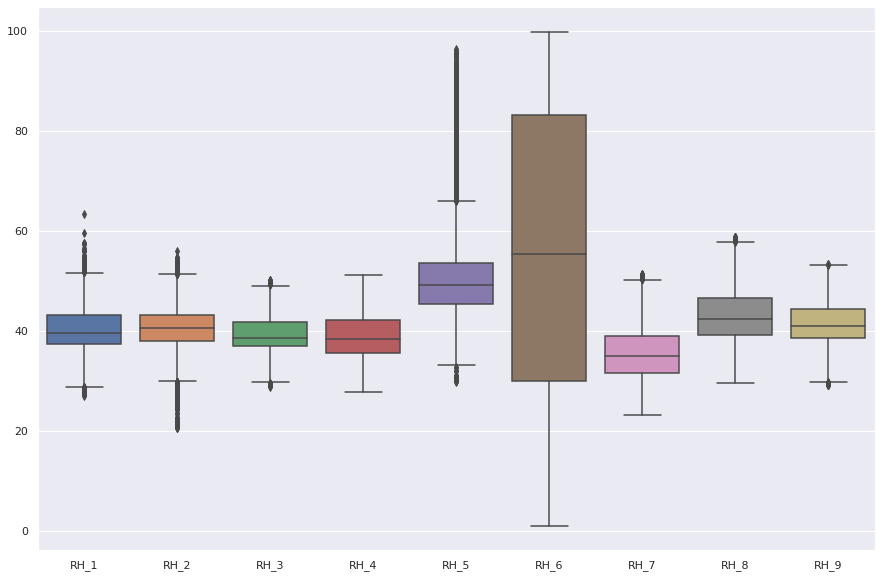

In [321]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=UCI_data[["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]])

Humidity outside the building (RH_6) has the highest frequency 

## Handling outliers:
Outliers are handled in a variety of ways, depending on datasets and the goals of the project. In our project they are maintained for further analysis because some of the outliers could represent valid data measurements. Furthermore, removing some outliers may cause the model to make unrealistic predictions, and when it comes to real-world data, the accuracy may alter because of changes in how outliers are handled, thus they were kept preserving the genuine accuracy numbers. 



### Choosing the features most relevant to the target column: 


In [299]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data_transformed, 40))

Top Absolute Correlations
week       month    0.977385
T_out      T6       0.974787
T9         T7       0.944776
           T5       0.911055
           T3       0.901324
T3         T1       0.892402
month      T9       0.890605
T9         T4       0.889439
week       T9       0.888777
T5         T3       0.888169
           T1       0.885247
RH_8       RH_7     0.883984
T7         T8       0.882123
           T4       0.877763
T4         T1       0.877001
T5         T4       0.871813
T7         T5       0.870624
T9         T8       0.869338
RH_9       RH_7     0.858686
RH_8       RH_9     0.855812
T4         T3       0.852778
T7         T3       0.847374
T9         T1       0.844777
T7         T1       0.838705
T1         T2       0.836834
week       T7       0.835119
month      T7       0.833005
T8         T1       0.825413
T5         T8       0.824981
RH_6       week     0.822492
           month    0.814363
T6         T2       0.801186
RH_7       RH_1     0.801122
RH_2       RH_1  

In [13]:
corr_matrix= data_transformed.corr()
corr_matrix

T1      RH_1        T2      RH_2        T3      RH_3  \
T1             1.000000  0.164006  0.836834 -0.002509  0.892402 -0.028550   
RH_1           0.164006  1.000000  0.269839  0.797535  0.253230  0.844677   
T2             0.836834  0.269839  1.000000 -0.165610  0.735245  0.121497   
RH_2          -0.002509  0.797535 -0.165610  1.000000  0.137319  0.678326   
T3             0.892402  0.253230  0.735245  0.137319  1.000000 -0.011234   
RH_3          -0.028550  0.844677  0.121497  0.678326 -0.011234  1.000000   
T4             0.877001  0.106180  0.762066 -0.047304  0.852778 -0.140457   
RH_4           0.097861  0.880359  0.231563  0.721435  0.122737  0.898978   
T5             0.885247  0.205797  0.720550  0.110409  0.888169 -0.050062   
RH_5          -0.014782  0.303258  0.029595  0.250271 -0.066355  0.375422   
T6             0.654769  0.316141  0.801186 -0.009670  0.686882  0.076833   
RH_6          -0.615045  0.245126 -0.580372  0.389933 -0.647672  0.514912   
T7             0.838705  0.021397  0.663660 -0.051422  0.847374 -0.250090   
RH_7           0.135182  0.801122  0.229212  0.690584  0.172624  0.832685   
T8             0.825413 -0.030053  0.578191 -0.041023  0.795283 -0.283228   
RH_8          -0.006441  0.736196  0.068534  0.679777  0.044427  0.828822   
T9             0.844777  0.115263  0.675535  0.054544  0.901324 -0.195270   
RH_9           0.071756  0.764001  0.157346  0.676467  0.134602  0.833538   
T_out          0.682846  0.340767  0.792255  0.033674  0.699417  0.118207   
Press_mm_hg   -0.150574 -0.293957 -0.133028 -0.255646 -0.189974 -0.233274   
RH_out        -0.345481  0.274126 -0.505291  0.584911 -0.281718  0.356192   
Windspeed     -0.087654  0.204932  0.052495  0.069190 -0.100776  0.263188   
Visibility    -0.076210 -0.021057 -0.069721 -0.005368 -0.102310  0.017041   
Tdewpoint      0.571309  0.639106  0.582602  0.499152  0.645886  0.414387   
rv1           -0.006203 -0.000699 -0.011087  0.006275 -0.005194 -0.000477   
rv2           -0.006203 -0.000699 -0.011087  0.006275 -0.005194 -0.000477   
TARGET_energy  0.155350  0.092847  0.208711 -0.085112  0.152129  0.005733   
month          0.706305 -0.094048  0.533479 -0.097914  0.790365 -0.414359   
weekday       -0.127088 -0.041397 -0.156913  0.037117 -0.077190 -0.048427   
hour           0.178858  0.018594  0.254784 -0.183322  0.037624 -0.052392   
week           0.694857 -0.100089  0.512884 -0.089292  0.792694 -0.429332   

                     T4      RH_4        T5      RH_5  ...  Windspeed  \
T1             0.877001  0.097861  0.885247 -0.014782  ...  -0.087654   
RH_1           0.106180  0.880359  0.205797  0.303258  ...   0.204932   
T2             0.762066  0.231563  0.720550  0.029595  ...   0.052495   
RH_2          -0.047304  0.721435  0.110409  0.250271  ...   0.069190   
T3             0.852778  0.122737  0.888169 -0.066355  ...  -0.100776   
RH_3          -0.140457  0.898978 -0.050062  0.375422  ...   0.263188   
T4             1.000000 -0.048650  0.871813 -0.076489  ...  -0.185747   
RH_4          -0.048650  1.000000  0.091812  0.352591  ...   0.300192   
T5             0.871813  0.091812  1.000000  0.032786  ...  -0.145011   
RH_5          -0.076489  0.352591  0.032786  1.000000  ...   0.082044   
T6             0.652350  0.259047  0.629161 -0.078337  ...   0.169185   
RH_6          -0.703149  0.392178 -0.632384  0.263797  ...   0.098317   
T7             0.877763 -0.131204  0.870624 -0.142823  ...  -0.185892   
RH_7           0.043527  0.894301  0.148905  0.325808  ...   0.212979   
T8             0.796256 -0.167066  0.824981 -0.086991  ...  -0.218876   
RH_8          -0.095192  0.847259  0.016388  0.359840  ...   0.202380   
T9             0.889439 -0.044518  0.911055 -0.138509  ...  -0.177756   
RH_9          -0.025549  0.856591  0.072308  0.272197  ...   0.238655   
T_out          0.663478  0.293289  0.651321 -0.053126  ...   0.192936   
Press_mm_hg   -0.075292 -0.250748 -0.170999 -0.119327  ...  -0.235032   
RH_out        -0.388602

In [14]:
corr_matrix = corr_matrix[['TARGET_energy']].copy()

In [15]:
corr_matrix.drop(index='TARGET_energy', inplace=True)

In [16]:
corr_matrix.sort_values('TARGET_energy', inplace=True)

In [17]:
#remove those features who have less than 100% (0.010) relationship with the targe variable
features_to_keep = corr_matrix.loc[~corr_matrix['TARGET_energy'].between(-0.010, 0.010)]

In [18]:
features_to_keep = features_to_keep.index.tolist()

In [19]:
features_to_keep

['RH_out',
 'RH_8',
 'RH_6',
 'RH_9',
 'RH_7',
 'RH_2',
 'Press_mm_hg',
 'weekday',
 'RH_5',
 'week',
 'month',
 'Tdewpoint',
 'T9',
 'Windspeed',
 'RH_1',
 'T7',
 'T5',
 'T4',
 'T8',
 'T3',
 'T1',
 'T_out',
 'T6',
 'T2',
 'hour']

In [20]:
data_transformed = data_transformed[features_to_keep+['TARGET_energy']].copy()

In [21]:
data_transformed.shape

(19735, 26)

## Split data:
Here, we split the training dataset into three sets(training, train_data and validating datesets),train_data to train the model\train the hypothesis, val_data to simulate the performance of the model on unseen datasets (val_data simulates unseen data), in other words, for testing and tuning parameters of the Algorithm. Test_data is out unseen data to evelute and compare the final hypothesis. 


In [22]:
from sklearn.model_selection import train_test_split
   
train_data, test_data = train_test_split(data_transformed, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))


Train data : 11841, Val Data: 3947, Test Data: 3947


In [23]:
train_X = train_data.drop(columns=['TARGET_energy']).to_numpy()
train_y = train_data[['TARGET_energy']].to_numpy()

val_X = val_data.drop(columns=['TARGET_energy']).to_numpy()
val_y = val_data[['TARGET_energy']].to_numpy()

test_X = test_data.drop(columns=['TARGET_energy']).to_numpy()
test_y = test_data[['TARGET_energy']].to_numpy()



### Scalling:
It is critical to scale the features using normalisation or standardisation following this step. We employ standardisation in our case since it improves model accuracy.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)
val_X=scaler.fit_transform(val_X)

train_y=scaler.fit_transform(train_y)
val_y=scaler.fit_transform(val_y)
test_y=scaler.fit_transform(test_y)


## Modeling:
Here, we will be using regression models, 
>- Lasso
>- ElasticNet
>- Ridge
>- DecisionTreeRegresson
>- KNeighborsRegressor
>-SVR
>-ExtraTreeRegressor
>-RandomForest
>-GradientBoostingRegressor
>-AdaBoostRegressor
>-LGBMRegressor
>-XGBRegressor

Based on their outcomes. We will use one of them to predict for the unseen data (Testing Dataset)

In [312]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()],
           ['LGBMRegressor:', LGBMRegressor()]
         ]

In [240]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 0
    curr_model_data["Model Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Training Time"] = end - start
    curr_model_data["Train R2 Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Val R2 Score"] = metrics.r2_score(val_y,curr_model.predict(val_X))
    curr_model_data["Validation RMSE Score"] = sqrt(mean_squared_error(val_y,curr_model.predict(val_X)))
    model_data.append(curr_model_data)

[08:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [241]:
result = pd.DataFrame(model_data)
result

Model Name  Training Time  Train R2 Score  Val R2 Score  \
0                       Lasso:        0.021548        0.000000      0.000000   
1                       Ridge:        0.003898        0.263645      0.279125   
2                  ElasticNet:        0.003178        0.000000      0.000000   
3       DecisionTreeRegresson:        0.354891        1.000000      0.395486   
4         KNeighborsRegressor:        0.000437        0.769432      0.629509   
5                          SVR:       8.910892        0.482394      0.456838   
6                 RandomForest       19.358188        0.958197      0.680166   
7          ExtraTreeRegressor :       5.795932        1.000000      0.705129   
8   GradientBoostingRegressor:        5.285071        0.481299      0.450066   
9                XGBRegressor:        1.121242        0.475209      0.447195   
10          AdaBoostRegressor:        0.855580        0.213025      0.240558   
11               LGBMRegressor:       0.559667        0.721287      0.603151   

    Validation RMSE Score  
0                1.000000  
1                0.849044  
2                1.000000  
3                0.777505  
4                0.608680  
5                0.736995  
6                0.565539  
7                0.543020  
8                0.741575  
9                0.743508  
10               0.871460  
11               0.629960

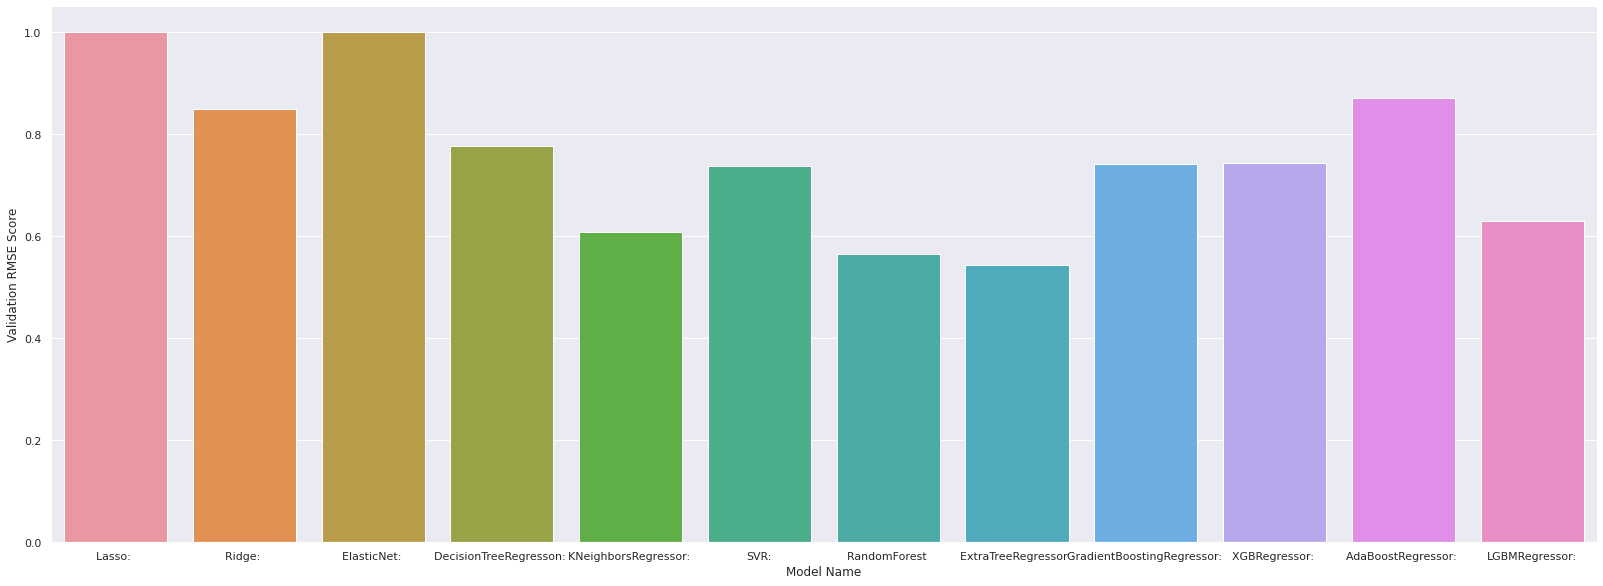

In [267]:

sns.factorplot(x= 'Model Name', y= 'Validation RMSE Score', data= result, kind='bar', legend='True')
plt.gcf().set_size_inches(30, 9)

Lasso and ElasticNet are the worst in performance, they got 100 error due to root-mean-square error acore, the best yet in performance are Extra Tree, Random Forest, KNeighbors, and Decision Tree are the best four models in terms of training and validating R2 scores and least validation RMSE

### Hyperparameter tuning for top 4 models:

### ExtraTreeRegressor:
ExtraTreeRegressor is similar to random forest, but it's better because it doesn't use bootstrap replicas, therefore xtra Trees uses the entire original sample, which could improve model accuracy when testing unseen data. Another significant difference is node splitting; Random Forest chooses the appropriate split whereas Extra Trees selects it at random, resulting in more accurate and realistic outcomes.

Hyper parameter tuning to get better Performance, we will tune n_estimators=100, random_state=10

In [268]:
ExtraTreeRegressor_model= ExtraTreesRegressor(n_estimators=100, random_state=10)
ExtraTreeRegressor_model.fit(train_X, train_y)

Train_R2_Score = metrics.r2_score(train_y,ExtraTreeRegressor_model.predict(train_X))
val_R2_Score = metrics.r2_score(val_y,ExtraTreeRegressor_model.predict(val_X))

print('Train R2 Score of ExtraTreesRegressor model ', Train_R2_Score)
print('Validation R2 Score of ExtraTreesRegressor model ', val_R2_Score)

Train R2 Score of ExtraTreesRegressor model  1.0
Validation R2 Score of ExtraTreesRegressor model  0.703246890511595


100% R2 score training accuracy means the model is overfitted; R2 Score isn't bad, but we'll attempt to improve it with other models; the generalisation gap between training and validation is huge

#### Unseen date prediction 

In [269]:
Test_R2_Score = metrics.r2_score(test_y,ExtraTreeRegressor_model.predict(test_X))
ExtraTreeRegressor_model_pre =  ExtraTreeRegressor_model.predict(test_X)
print('Test R2 Score of ExtraTreesRegressor model ', Test_R2_Score)

Test R2 Score of ExtraTreesRegressor model  0.7249235239358378


The model is overfitted in training, but has a good validation and testing scores

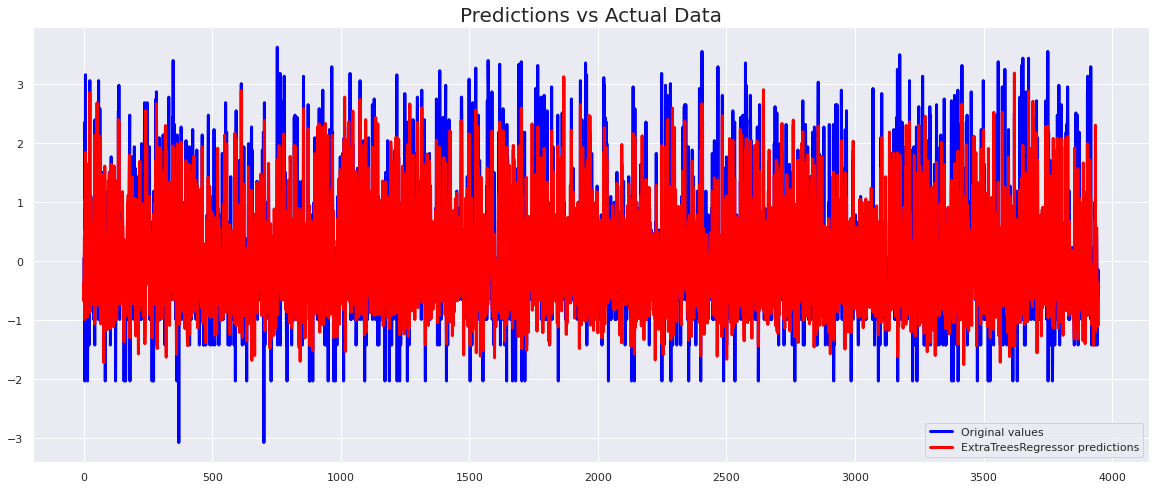

In [270]:
plt.figure(figsize=(20,8))
plt.plot(test_y, c="blue", linewidth=3, label="Original values")
plt.plot(ExtraTreeRegressor_model_pre, c="red", linewidth=3, label="ExtraTreesRegressor predictions")
plt.legend()
plt.title("Predictions vs Actual Data", fontsize=20)
plt.show()

### RandomForestRegressor Model:
We chose this model because it takes less time to prepare the data during pre-processing, and there are no requirements for normalization or minimization (we may apply it for better performance). Moreover, missing values can be handled very well with this model

In [25]:

RandomForestRegressor_model= RandomForestRegressor(bootstrap=True, max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
RandomForestRegressor_model.fit(train_X, train_y)

Train_R2_Score = metrics.r2_score(train_y,RandomForestRegressor_model.predict(train_X))
val_R2_Score = metrics.r2_score(val_y,RandomForestRegressor_model.predict(val_X))

print('Train R2 Score of RandomForestRegressor model ', Train_R2_Score)
print('Validation R2 Score of RandomForestRegressor model ', val_R2_Score)

Train R2 Score of RandomForestRegressor model  0.9374928395282941
Validation R2 Score of RandomForestRegressor model  0.654616435310384


In [26]:
Test_R2_Score = metrics.r2_score(test_y,RandomForestRegressor_model.predict(test_X))
RandomForestRegressor_model_pre =  RandomForestRegressor_model.predict(test_X)
print('Test R2 Score of RandomForestRegressor model ', Test_R2_Score)

Test R2 Score of RandomForestRegressor model  0.6456275899343829


Perfect result in  training but there is a gap between training results and test and validation results

#### Unseen date prediction 

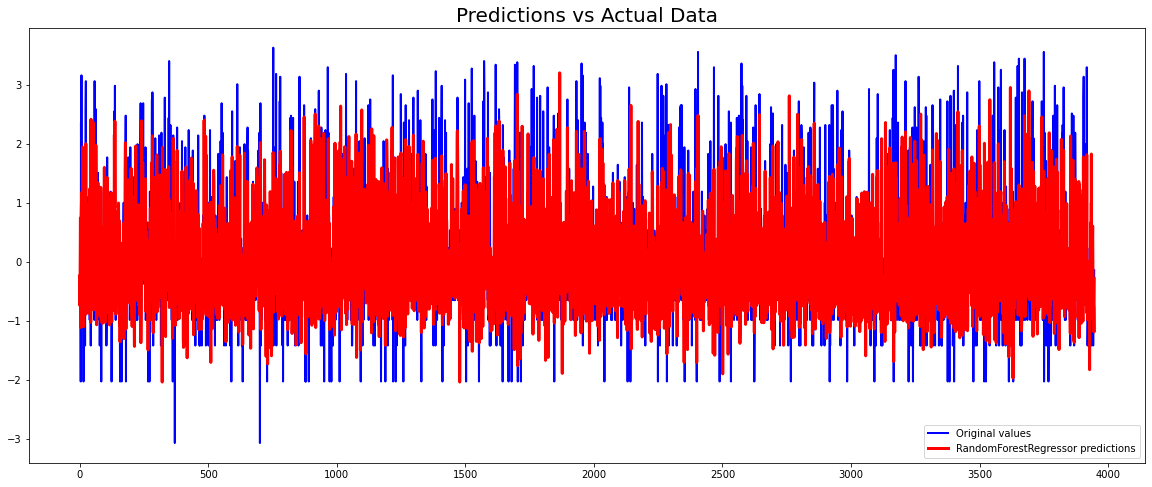

In [27]:
plt.figure(figsize=(20,8))
plt.plot(test_y, c="blue", linewidth=2, label="Original values")
plt.plot(RandomForestRegressor_model_pre, c="red", linewidth=3, label="RandomForestRegressor predictions")
plt.legend()
plt.title("Predictions vs Actual Data", fontsize=20)
plt.show()


Random Forest Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

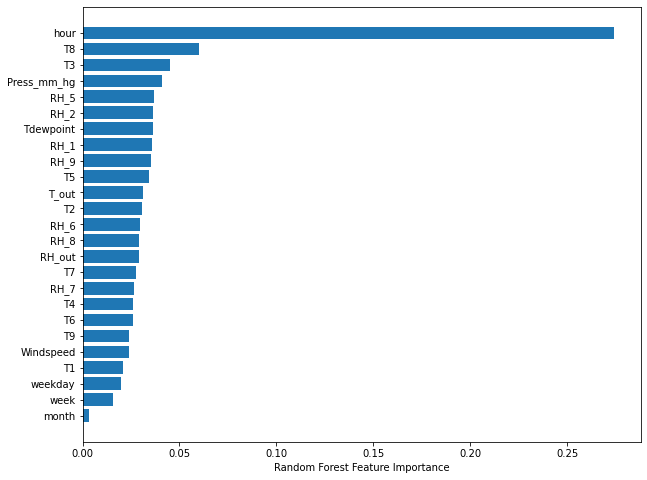

In [28]:
plt.figure(figsize=(10,8))
sorted_idx = RandomForestRegressor_model.feature_importances_.argsort()
plt.barh(train_data.columns[sorted_idx], RandomForestRegressor_model.feature_importances_[sorted_idx])

plt.xlabel("Random Forest Feature Importance")

#### Tunning RF the algorithm:
Attempting to seek better performance by tunning thee parameters, 
min_samples_leaf and max_depth prevent the tree from overfitting but they may prevent the tree from growing and taking large samples, but if we adjust them, we may achieve better performance while trying to allow the tree to grow

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

forest = RandomForestRegressor(n_jobs=-1)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [30]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.9068791256351151 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.9068435219359039 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.5815420972886517 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.5863524043553859 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.9496691851803942 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.5577646466515336 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.562686759195195 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.5772421881634676 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.949438502393427 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.578931917501129 {'n_estimators': 110, 'min_samples

In [32]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, n_jobs=-1)

In [33]:
rf_random.best_params_


{'max_depth': 45,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 200}

In [34]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(val_X)
errors = abs(random_best - val_y)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / val_y))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 69.76 %


In [35]:
#this is the RMSE
final_mse = mean_squared_error(val_y, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.56


In [36]:
final_model = rf_random.best_estimator_
# Predicting test set results
Model_pred = final_model.predict(val_X)
mse = mean_squared_error(val_y, Model_pred)
final_rmse = np.sqrt(mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.56


In [146]:
#calculate accuracy
errors = abs(Model_pred - val_y)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors /val_y))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the val set an accuracy of', round(accuracy, 2),'%')


The best model achieves on the test set an accuracy of 69.72 %


The model's accuracy has improved from 0.64 to 69.7% so far.

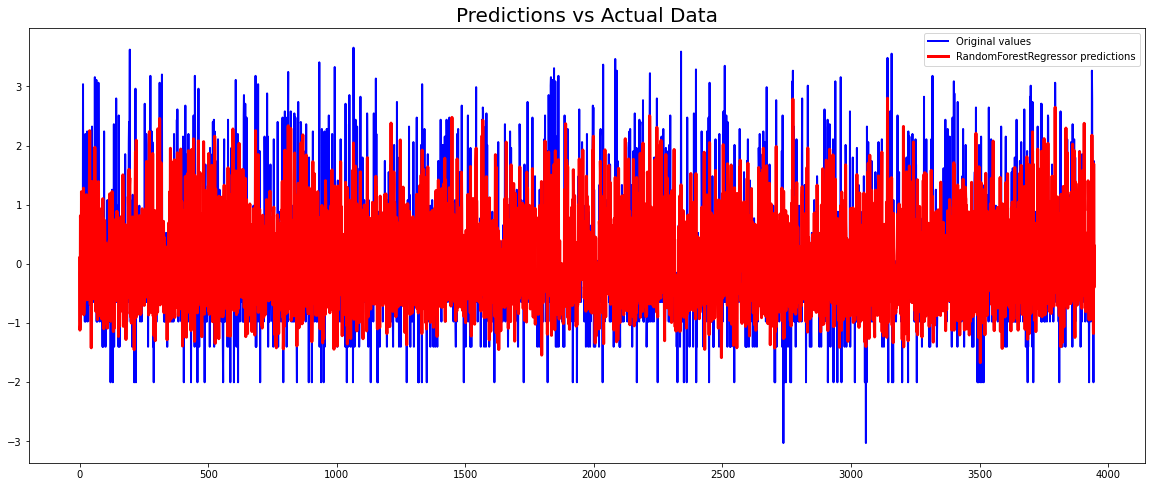

In [147]:
plt.figure(figsize=(20,8))
plt.plot(val_y, c="blue", linewidth=2, label="Original values")
plt.plot(Model_pred, c="red", linewidth=3, label="RandomForestRegressor predictions")
plt.legend()
plt.title("Predictions vs Actual Data", fontsize=20)
plt.show()

Random Forest model's limitations:
The model's drawbacks include its complexity, which stems from the fact that it generates a large number of trees using the Python sklearn module, as well as the fact that it takes a longer time to train than decision tree and Extra tree model. Also, it requires more resources to tune and implement. (This is one of the main challenges I faced with this project is tuning this model for best performance.)

### KNeighbors Regressor Model: 
One of the most significant advantages of this method is that it does not require a training phase, in other words, it does not learn anything from training data. It saves the training dataset and uses it only when making real-time forecasts to learn from it. This makes the KNN method considerably faster than other training-based algorithms. Furthermore, because the KNN model does not require any training before making predictions, new data can be supplied without affecting the algorithm's accuracy. In addition, this model is easy to implement.

In [284]:
KNeighborsRegressor_model = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
KNeighborsRegressor_model.fit(train_X, train_y)

Train_R2_Score = metrics.r2_score(train_y,KNeighborsRegressor_model.predict(train_X))
val_R2_Score = metrics.r2_score(val_y,KNeighborsRegressor_model.predict(val_X))

print('Train R2 Score of RandomForestRegressor model ', Train_R2_Score)
print('Validation R2 Score of RandomForestRegressor model ', val_R2_Score)

Train R2 Score of RandomForestRegressor model  0.769432437802354
Validation R2 Score of RandomForestRegressor model  0.6295090716227054


In [285]:
Test_R2_Score = metrics.r2_score(test_y,KNeighborsRegressor_model.predict(test_X))
KNeighborsRegressor_model_pre =  KNeighborsRegressor_model.predict(test_X)
print('Test R2 Score of KNeighborsRegressor model ', Test_R2_Score)

Test R2 Score of KNeighborsRegressor model  0.6231147191073219


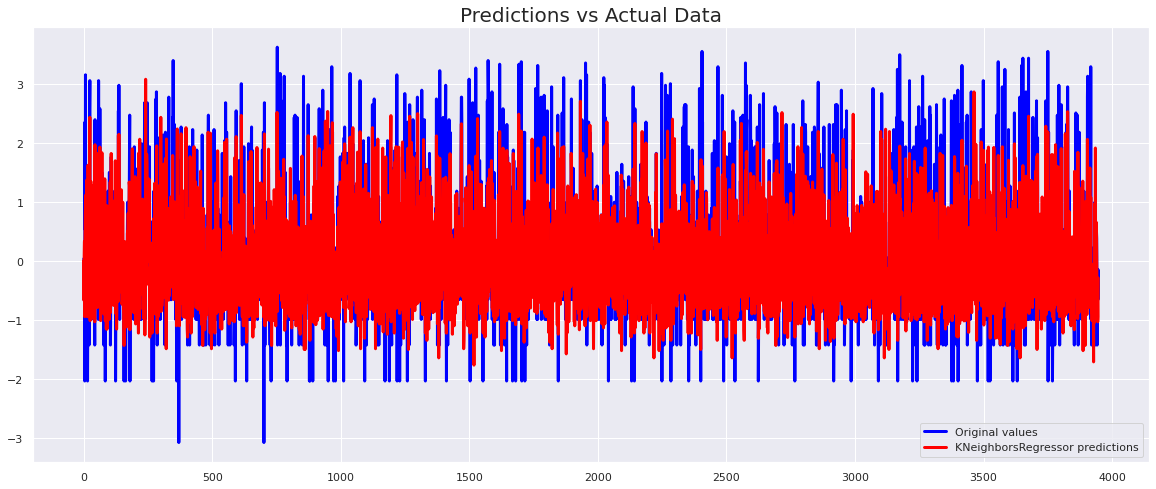

In [286]:
plt.figure(figsize=(20,8))
plt.plot(test_y, c="blue", linewidth=3, label="Original values")
plt.plot(KNeighborsRegressor_model_pre, c="red", linewidth=3, label="KNeighborsRegressor predictions")
plt.legend()
plt.title("Predictions vs Actual Data", fontsize=20)
plt.show()

## Decision Tree Regressor:
This algorithm requires less effort during the pre-processing phase to prepare data, as there is no requirement for data normalisation or scaling. In addition, Decision Tree can manage missing data, and missing values will not impair the algorithm's or predictions' performance. Furthermore, it is simple to carry out and explain to stakeholders in real-world challenges. Moreover, it is suitable for solving nonlinear problems as the one we have. However, Decision Tree takes longer to train the data than many other algorithms.

In [287]:
DecisionTreeRegressor_model = DecisionTreeRegressor(max_depth=100, min_samples_split=100)
DecisionTreeRegressor_model.fit(train_X, train_y)

Train_R2_Score = metrics.r2_score(train_y,DecisionTreeRegressor_model.predict(train_X))
val_R2_Score = metrics.r2_score(val_y,DecisionTreeRegressor_model.predict(val_X))

print('Train R2 Score of DecisionTreeRegressor model ', Train_R2_Score)
print('Validation R2 Score of DecisionTreeRegresso model ', val_R2_Score)

Train R2 Score of DecisionTreeRegressor model  0.6171392610466299
Validation R2 Score of DecisionTreeRegresso model  0.4687070616016442


In [288]:
Test_R2_Score = metrics.r2_score(test_y,DecisionTreeRegressor_model.predict(test_X))
DecisionTreeRegressor_model_pre =  DecisionTreeRegressor_model.predict(test_X)
print('Test R2 Score of KNeighborsRegressor model ', Test_R2_Score)

Test R2 Score of KNeighborsRegressor model  0.4350581827469252


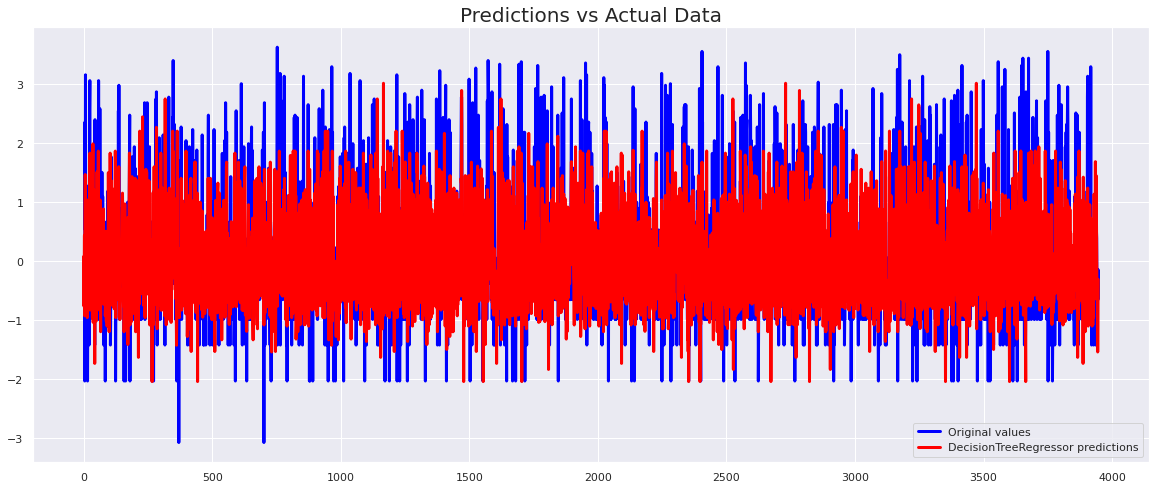

In [290]:
plt.figure(figsize=(20,8))
plt.plot(test_y, c="blue", linewidth=3, label="Original values")
plt.plot(DecisionTreeRegressor_model_pre, c="red", linewidth=3, label="DecisionTreeRegressor predictions")
plt.legend()
plt.title("Predictions vs Actual Data", fontsize=20)
plt.show()

The Decision Tree Regressor performed the lowest among these four models, so it will be excluded 

Final prediction for unseen data: 
>- RF for all featuers 


In [41]:
final_model.fit(train_X, train_y)

final_model_Train_R2_Score = metrics.r2_score(train_y,final_model.predict(train_X))
final_model_val_R2_Score = metrics.r2_score(val_y,final_model.predict(val_X))

print('Train R2 Score of RandomForestRegressor model ', final_model_Train_R2_Score)
print('Validation R2 Score of RandomForestRegressor model ', final_model_val_R2_Score)

Train R2 Score of RandomForestRegressor model  0.9304563150487241
Validation R2 Score of RandomForestRegressor model  0.6829295039738459


This step was expected to show the result. in the same format

In [39]:
Test_R2_Score = metrics.r2_score(test_y,final_model.predict(test_X))
final_model_pre =  final_model.predict(test_X)
print('Test R2 Score of RandomForestRegressor model ', Test_R2_Score)

Test R2 Score of RandomForestRegressor model  0.6846295983364961


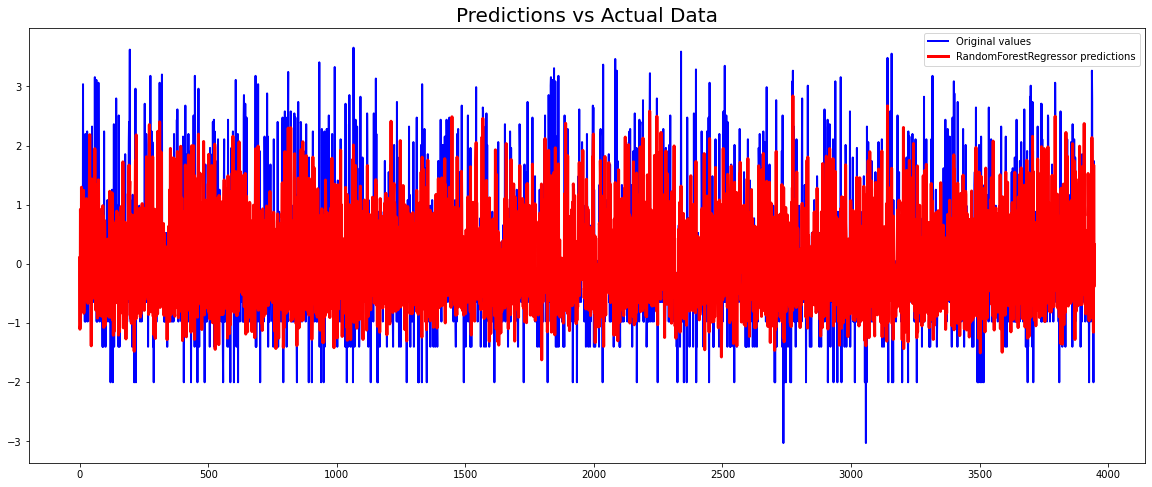

In [40]:
plt.figure(figsize=(20,8))
plt.plot(val_y, c="blue", linewidth=2, label="Original values")
plt.plot(Model_pred, c="red", linewidth=3, label="RandomForestRegressor predictions")
plt.legend()
plt.title("Predictions vs Actual Data", fontsize=20)
plt.show()

## Deep learning:
Let's try to train the data with RNN:
A little about this model, The power of RNN lies in its ability to solve a wide range of problems, including classification and regression. In other words, this technique may be used in any application. It can tackle both linear and non-linear problems. In addition, if an item of RNN declines, its parallel properties allow it to continue without problems. Furthermore, in most real-world problems, this method brings the highest results. However, it takes time to get things done and requires more resources to run.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# network architecture
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))
model.add(Dense(1))

# model compile
model.compile(loss='mse', optimizer='adam')


# fit
history = model.fit(train_X, train_y, epochs=120, batch_size=10, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Epoch 1/120
1185/1185 - 32s - loss: 0.9801 - val_loss: 0.9502 - 32s/epoch - 27ms/step
Epoch 2/120
1185/1185 - 31s - loss: 0.9532 - val_loss: 0.9369 - 31s/epoch - 27ms/step
Epoch 3/120
1185/1185 - 25s - loss: 0.9408 - val_loss: 0.9330 - 25s/epoch - 21ms/step
Epoch 4/120
1185/1185 - 18s - loss: 0.9276 - val_loss: 0.9135 - 18s/epoch - 15ms/step
Epoch 5/120
1185/1185 - 17s - loss: 0.9192 - val_loss: 0.9225 - 17s/epoch - 14ms/step
Epoch 6/120
1185/1185 - 16s - loss: 0.9096 - val_loss: 0.9087 - 16s/epoch - 13ms/step
Epoch 7/120
1185/1185 - 17s - loss: 0.8967 - val_loss: 0.8985 - 17s/epoch - 15ms/step
Epoch 8/120
1185/1185 - 16s - loss: 0.8843 - val_loss: 0.8855 - 16s/epoch - 14ms/step
Epoch 9/120
1185/1185 - 17s - loss: 0.8720 - val_loss: 0.8789 - 17s/epoch - 14ms/step
Epoch 10/120
1185/1185 - 17s - loss: 0.8738 - val_loss: 0.8671 - 17s/epoch - 14ms/step
Epoch 11/120
1185/1185 - 17s - loss: 0.8565 - val_loss: 0.8556 - 17s/epoch - 14ms/step
Epoch 12/120
1185/1185 - 17s - loss: 0.8469 - val_lo

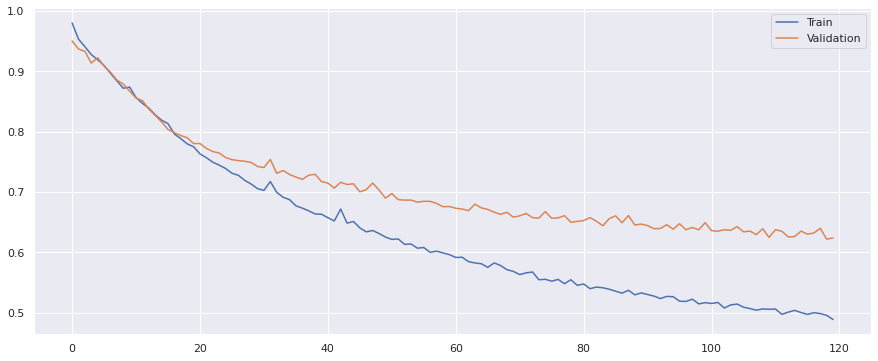

In [ ]:
# plot history

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

nn_score_pre = model.predict(test_X)
ev_r2_score = model.evaluate(test_X, test_y, verbose=0)
print("R2 Score of NN model = ",ev_r2_score)


R2 Score of NN model =  0.6240426898002625


No handles with labels found to put in legend.


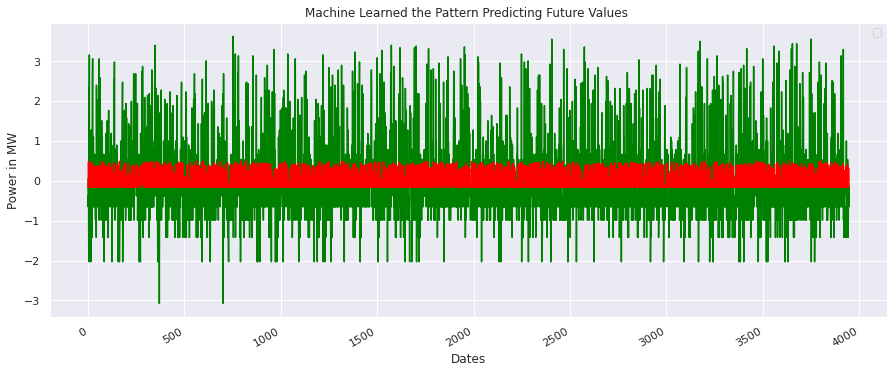

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)
y1= nn_score_pre[:,0]
y = test_y

plt.plot(y, color="green")
plt.plot(y1, color="red")
plt.gcf().autofmt_xdate()
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

The R2 score is 0.62 not bad but it is not higher than the four supervised models, and the test data as plot shows is a bit disappointing, it shows that the predicting data range is much shorter than the actual data range. Therefore, we will try to enhance the performance by adding more LSTM layers.

In [133]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

regressor = Sequential()


# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [134]:
history = regressor.fit(train_X, train_y, epochs=200, batch_size=100, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Epoch 1/200
119/119 - 13s - loss: 0.9689 - val_loss: 0.8738 - 13s/epoch - 107ms/step
Epoch 2/200
119/119 - 2s - loss: 0.8559 - val_loss: 0.8158 - 2s/epoch - 15ms/step
Epoch 3/200
119/119 - 2s - loss: 0.8430 - val_loss: 0.8078 - 2s/epoch - 16ms/step
Epoch 4/200
119/119 - 2s - loss: 0.8313 - val_loss: 0.7917 - 2s/epoch - 15ms/step
Epoch 5/200
119/119 - 2s - loss: 0.8199 - val_loss: 0.7809 - 2s/epoch - 15ms/step
Epoch 6/200
119/119 - 2s - loss: 0.8159 - val_loss: 0.7742 - 2s/epoch - 16ms/step
Epoch 7/200
119/119 - 2s - loss: 0.8107 - val_loss: 0.7711 - 2s/epoch - 16ms/step
Epoch 8/200
119/119 - 2s - loss: 0.8051 - val_loss: 0.7657 - 2s/epoch - 15ms/step
Epoch 9/200
119/119 - 2s - loss: 0.8024 - val_loss: 0.7602 - 2s/epoch - 15ms/step
Epoch 10/200
119/119 - 2s - loss: 0.8012 - val_loss: 0.7571 - 2s/epoch - 15ms/step
Epoch 11/200
119/119 - 2s - loss: 0.7959 - val_loss: 0.7555 - 2s/epoch - 16ms/step
Epoch 12/200
119/119 - 2s - loss: 0.7932 - val_loss: 0.7518 - 2s/epoch - 16ms/step
Epoch 13/2

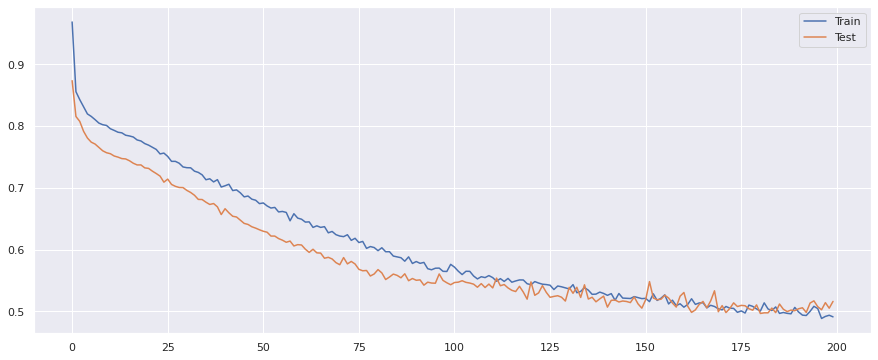

In [135]:
# plot history

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [137]:
from sklearn.metrics import r2_score

RNN_score_pre = regressor.predict(test_X)
model_score = regressor.evaluate(test_X, test_y, verbose=0)
print("Score of RNN model = ",model_score)


Score of RNN model =  0.4917598068714142


No handles with labels found to put in legend.


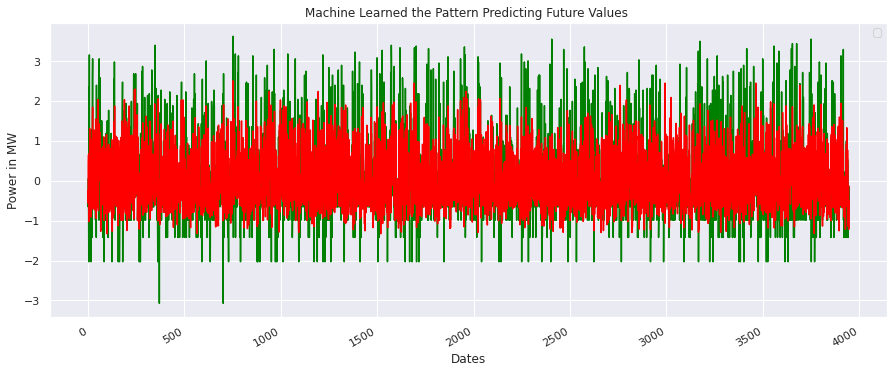

In [138]:
fig = plt.figure()

ax1= fig.add_subplot(111)
y1= RNN_score_pre[:,0]
y = test_y

plt.plot(y, color="green")
plt.plot(y1, color="red")

# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

After adding more layers, we ended up having less accuracy score, but lower in mean_squared_error( 0.4912) as a result of increasing epoch

## Another Try with time series features : 

In [313]:
# This dataset kept for time series modeling with RNN
UCI_data_copy.head(3)

T1       RH_1         T2       RH_2     T3  \
date                                                                     
2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.23   
2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.89   
2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.60   

                          RH_3         T4       RH_4         T5       RH_5  \
date                                                                         
2016-04-19 20:30:00  37.030000  22.318571  36.610000  20.633333  62.166667   
2016-03-05 04:40:00  37.663333  18.700000  36.260000  18.463333  43.560000   
2016-03-14 12:40:00  36.290000  21.000000  34.826667  18.100000  46.126667   

                     ...  Windspeed  Visibility  Tdewpoint        rv1  \
date                 ...                                                
2016-04-19 20:30:00  ...        3.5   40.000000   3.350000  24.061869   
2016-03-05 04:40:00  ...        1.0   41.333333   0.100000   4.622052   
2016-03-14 12:40:00  ...        6.0   22.666667  -0.266667   5.635898   

                           rv2  TARGET_energy  month  weekday  hour  week  
date                                                                       
2016-04-19 20:30:00  24.061869             60      4       19    20    16  
2016-03-05 04:40:00   4.622052             50      3        5     4     9  
2016-03-14 12:40:00   5.635898             80      3       14    12    11  

[3 rows x 31 columns]

In [314]:
UCI_data_copy_featears = UCI_data_copy[['month',	'weekday',	'hour',	'week'	,'TARGET_energy']]
UCI_data_copy_featears.head(3)

month  weekday  hour  week  TARGET_energy
date                                                          
2016-04-19 20:30:00      4       19    20    16             60
2016-03-05 04:40:00      3        5     4     9             50
2016-03-14 12:40:00      3       14    12    11             80

In [316]:
UCI_data_copy_featears.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-04-19 20:30:00 to 2016-02-16 10:20:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   month          19735 non-null  int64
 1   weekday        19735 non-null  int64
 2   hour           19735 non-null  int64
 3   week           19735 non-null  int64
 4   TARGET_energy  19735 non-null  int64
dtypes: int64(5)
memory usage: 1.4 MB


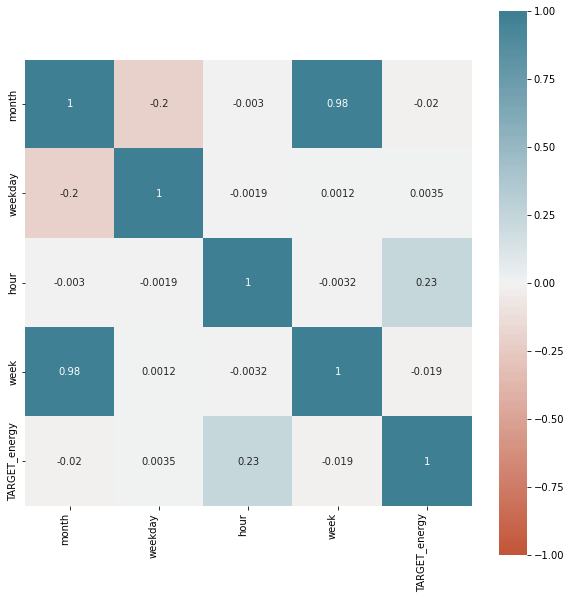

In [18]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 10))
corr = UCI_data_copy_featears.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
  
);

The strongest correlation we got between the target column and the time features is with the Hour column

In [317]:
from sklearn.model_selection import train_test_split
   
train_data, test_data = train_test_split(UCI_data_copy_featears, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))


Train data : 11841, Val Data: 3947, Test Data: 3947


In [318]:
train_X = train_data.drop(columns=['TARGET_energy']).to_numpy()
train_y = train_data[['TARGET_energy']].to_numpy()

val_X = val_data.drop(columns=['TARGET_energy']).to_numpy()
val_y = val_data[['TARGET_energy']].to_numpy()

test_X = test_data.drop(columns=['TARGET_energy']).to_numpy()
test_y = test_data[['TARGET_energy']].to_numpy()



In [319]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)
val_X=scaler.fit_transform(val_X)

train_y=scaler.fit_transform(train_y)
val_y=scaler.fit_transform(val_y)
test_y=scaler.fit_transform(test_y)


In [156]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Dropout, Flatten

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = regressor.fit(train_X, train_y, epochs=30, batch_size=1, validation_data=(val_X, val_y))




Epoch 1/30
11841/11841 [==============================] - 131s 11ms/step - loss: 0.9453 - accuracy: 0.0000e+00 - val_loss: 0.9107 - val_accuracy: 0.0000e+00
Epoch 2/30
11841/11841 [==============================] - 125s 11ms/step - loss: 0.9211 - accuracy: 0.0000e+00 - val_loss: 0.9061 - val_accuracy: 0.0000e+00
Epoch 3/30
11841/11841 [==============================] - 121s 10ms/step - loss: 0.9149 - accuracy: 0.0000e+00 - val_loss: 0.8844 - val_accuracy: 0.0000e+00
Epoch 4/30
11841/11841 [==============================] - 122s 10ms/step - loss: 0.9011 - accuracy: 0.0000e+00 - val_loss: 0.8646 - val_accuracy: 0.0000e+00
Epoch 5/30
11841/11841 [==============================] - 120s 10ms/step - loss: 0.8901 - accuracy: 0.0000e+00 - val_loss: 0.8607 - val_accuracy: 0.0000e+00
Epoch 6/30
11841/11841 [==============================] - 122s 10ms/step - loss: 0.8768 - accuracy: 0.0000e+00 - val_loss: 0.8536 - val_accuracy: 0.0000e+00
Epoch 7/30
11841/11841 [==============================] - 

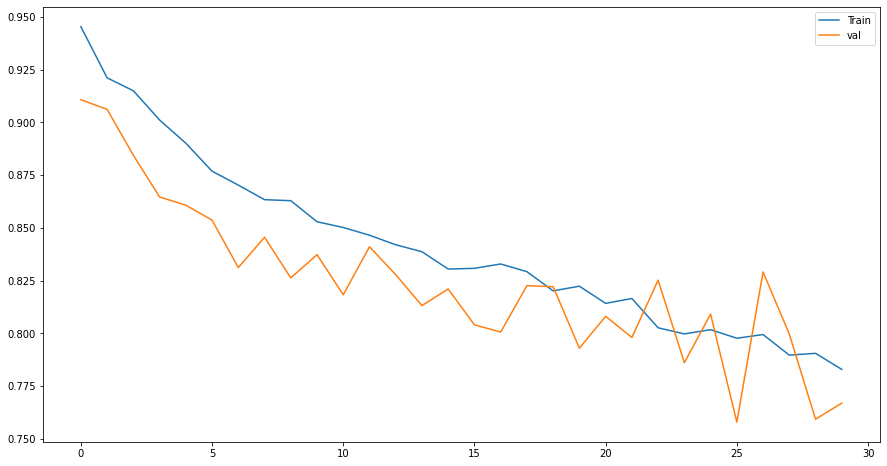

In [165]:
# plot history

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()



The RNN model performed exceptionally well in training, scoring 0.78, Plus the MSE is 0.7829 in traning and 0.7669 in validation. The performance of RNN with time features is better than the performance with all features. Overall, the model did well in predicting the unseen values 

### Prediction:
I would strongly recommend the RNN model for the ultimate decision on which algorithm to use in a real-world scenario because it is appropriate for all real-world applications, it can handle regression and classification, and it can generate stronger forecasts than other models with the help of LSM layers. Furthermore, because the dataset contains time series features, this model is well-suited for training time series problems. Unlike other models, RNN can handle large datasets, hence the size of the dataset will not be an issue. It can also deal with both linear and non-linear issues. It uses a unique technique in comparison to regular NN, in which the layers are fed back with data to improve performance, as opposed to feedforward NN. However, training on the data takes a long time. 

Unfortunately, in our case, the model takes a long time to process data and does not provide better performance than alternative models such as Random forest. With 200 epochs, the mean squared error for training is 0.4912 and for validation is 0.5163, even after adding extra layers to RNN. As a result, I would recommend Random Forest for the final prediction because it is robust in dealing with regression and classification issues. Missing and outlier values will be handled automatically as well. Furthermore, it has the ability to forecast better than decision tree, KNeighbor, and Extra tree models. Furthermore, unlike other models, Random Forest overcomes the overfitting problem. It uses a unique technique in comparison to regular NN, in which the layers are fed back with data to improve performance, as opposed to feedforward NN. However, RNN was chosen for the time series modelling aspect since it got high accuracy score 0.78%. 

So, Random Forest for all features, RNN for time series forecasting 

### RNN for time series 

In [158]:

from sklearn.metrics import r2_score

RNN_pre = regressor.predict(test_X)
model_score = regressor.evaluate(test_X, test_y, verbose=0)
print("Score of RNN model = ",model_score)


Score of RNN model =  [0.7880676984786987, 0.0]


Good accuracy with time features On unseen data

No handles with labels found to put in legend.


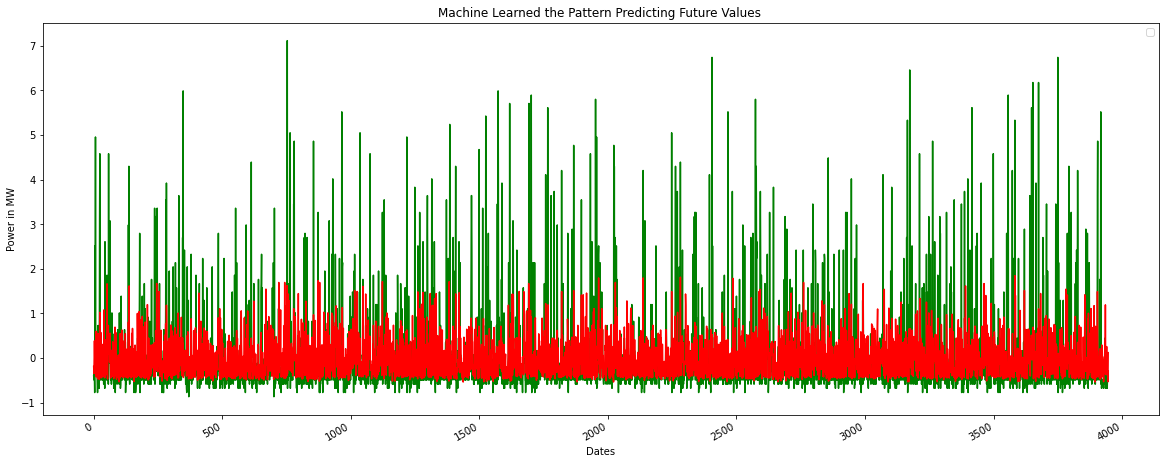

In [166]:
plt.figure(figsize=(20,8))

ax1= fig.add_subplot(111)

y = test_y
y1= RNN_pre
plt.plot(y, color="green")
plt.plot(y1, color="red")


# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

### Reference list:

[1] Batbaatar, E., Park, H. W., Li, D., Li, M., & Ryu, K. H. (2018, March). DeepEnergy: Prediction of appliances energy with long-short term memory recurrent neural network. In Asian Conference on Intelligent Information and Database Systems (pp. 224-234). Springer, Cham.      

[2] Candanedo, L. M., Feldheim, V., & Deramaix, D. (2017). Data driven prediction models of energy use of appliances in a low-energy house. Energy and buildings, 140, 81-97.